In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib as mp
import matplotlib.pyplot as plt
import scienceplots
import scipy
import math
import scipy.linalg as sla
from scipy.integrate import quad
from scipy.interpolate import interp1d
import kwant
import mpmath
from matplotlib.colors import LogNorm

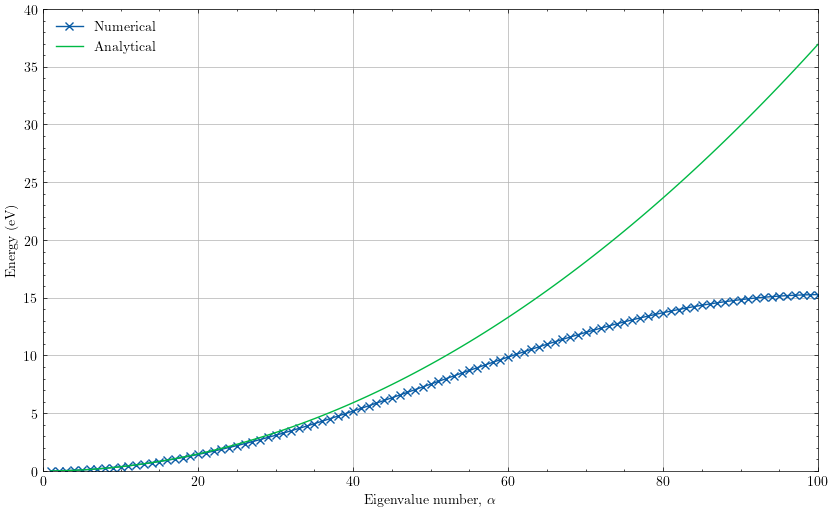

In [8]:
plt.figure(figsize=(10,6))

hbar = 6.626e-34/(2*np.pi)
a = 1e-10
m = 9.1e-31
t_0 = hbar**2/(2*m*a**2)
eV = 1.6e-19
N = 100
H = 2*t_0*np.diag(np.ones(N),0) - t_0*np.diag(np.ones(N-1),1) - t_0*np.diag(np.ones(N-1),-1)
E, psi = np.linalg.eig(H)
theo_E = [0]*N
for i in range(0, N):
  theo_E[i] = (hbar*np.pi*(i+1))**2/(2*m*((N+1)*a)**2)/eV

index = np.argsort(E)
sort_E = np.sort(E[index])
sort_psi = psi[:,index]

plt.xlim(0,N)
plt.ylim(0,40)
plt.plot(range(1, N+1), sort_E/eV, marker='x', label = 'Numerical')
plt.plot(range(1, N+1), theo_E, label = 'Analytical')
plt.ylabel('Energy (eV)')
plt.xlabel('Eigenvalue number, 'r'$\alpha$')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("discrete_PIB.png")
plt.show()

In [ ]:
plt.xlim(0,N)
plt.ylim(0,0.02)
plt.plot(range(1, N+1), sort_psi[0]**2, label=r'$\alpha$ = 1')
plt.plot(range(1, N+1), sort_psi[24]**2, label=r'$\alpha$ = 25')
plt.legend(loc='upper right')
plt.xlabel('Lattice site number')
plt.ylabel('Probability')
plt.show()

In [ ]:
hbar = 1.055e-34
m = 9.110e-31
epsil = 8.854e-12
q = 1.602e-19
a0 = 4*np.pi*epsil*hbar**2/(m*q**2)
E0 = q/(8*np.pi*epsil*a0)

N = 100
a = (5e-10/N)
R = a*np.arange(1, N+1)
t0 = (hbar**2)/(2*m*(a**2))/q

n = 1
l = 0

K = (2*t0*np.diag(np.ones(N))) - (t0*np.diag(np.ones(N-1), 1)) - (t0*np.diag(np.ones(N-1), -1))
U = (-q/(4*np.pi*epsil)/R) + (l*(l+1)*hbar**2/(2*m*q))/R**2
U = np.diag(U)
D, V = np.linalg.eig(K + U)
ind = np.argsort(D)
E = D[ind[n-l]]
psi = V[:, ind[n-l]]
P = np.abs(psi)**2

# Analytical solutions
P1s = (4*a/(a0**3))*(R**2)*np.exp(-2*R/a0)
P2s = (4*a/(2*4*4*(a0**3)))*(R**2)*((2-(R/a0))**2)*np.exp(-2*R/(2*a0))
P3s = (4*a/(3*81*81*(a0**3)))*(R**2)*((27-(18*R/a0) + (2*(R/a0)**2))**2)*np.exp(-2*R/(3*a0))
P2p = (4*a/(3*32*(a0**3)))*(R**2)*((R/a0)**2)*np.exp(-2*R/(2*a0))
P3p = (8*a/(3*81*81*(a0**3)))*(R**2)*((6-(R/a0))**2)*((R/a0)**2)*np.exp(-2*R/(3*a0))

plt.plot(R/1e-10, P, 'b', label='Numerical')
plt.plot(R/1e-10, P2s, 'gx', label='Analytical')
plt.xlabel('x (m)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [ ]:
hbar = 1.055e-34
m = 9.110e-31
epsil = 8.854e-12
q = 1.602e-19
a0 = 4*np.pi*epsil*hbar**2/(m*q**2)
E0 = q/(8*np.pi*epsil*a0)

N = 100
a = (5e-10*2/N)
R = a*np.arange(1, N+1)
t0 = (hbar**2)/(2*m*(a**2))/q

n = 1
l = 0

K = (2*t0*np.diag(np.ones(N))) - (t0*np.diag(np.ones(N-1), 1)) - (t0*np.diag(np.ones(N-1), -1))
U = (-q/(4*np.pi*epsil)/R) + (l*(l+1)*hbar**2/(2*m*q))/R**2
U = np.diag(U)
D, V = np.linalg.eig(K + U)
ind = np.argsort(D)
E = D[ind[n-l]]
psi = V[:, ind[n-l]]
P = np.abs(psi)**2

# Analytical solutions
P1s = (4*a/(a0**3))*(R**2)*np.exp(-2*R/a0)
P2s = (4*a/(2*4*4*(a0**3)))*(R**2)*((2-(R/a0))**2)*np.exp(-2*R/(2*a0))
P3s = (4*a/(3*81*81*(a0**3)))*(R**2)*((27-(18*R/a0) + (2*(R/a0)**2))**2)*np.exp(-2*R/(3*a0))
P2p = (4*a/(3*32*(a0**3)))*(R**2)*((R/a0)**2)*np.exp(-2*R/(2*a0))
P3p = (8*a/(3*81*81*(a0**3)))*(R**2)*((6-(R/a0))**2)*((R/a0)**2)*np.exp(-2*R/(3*a0))

plt.plot(R/1e-10, P, 'b', label='Numerical')
plt.plot(R/1e-10, P2s, 'gx', label='Analytical')
plt.xlabel('x (m)')
plt.ylabel('Probability')
plt.legend()
plt.show()

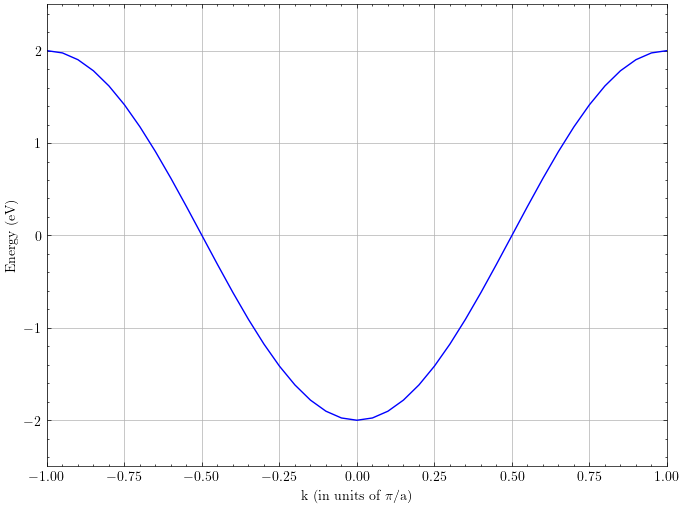

In [9]:
plt.figure(figsize=(8,6))

E_0 = 0
E_ss = -1
k = np.arange(-1, 1.05, 0.05)
E = E_0 + 2*E_ss*np.cos(np.pi*k)

plt.plot(k, E, 'b')
plt.xlim(-1,1)
plt.ylim(-2.5,2.5)
plt.xlabel('k (in units of 'r'$\pi$/a)')
plt.ylabel('Energy (eV)')
plt.grid(True)
plt.savefig("1D_chain.png")
plt.show()

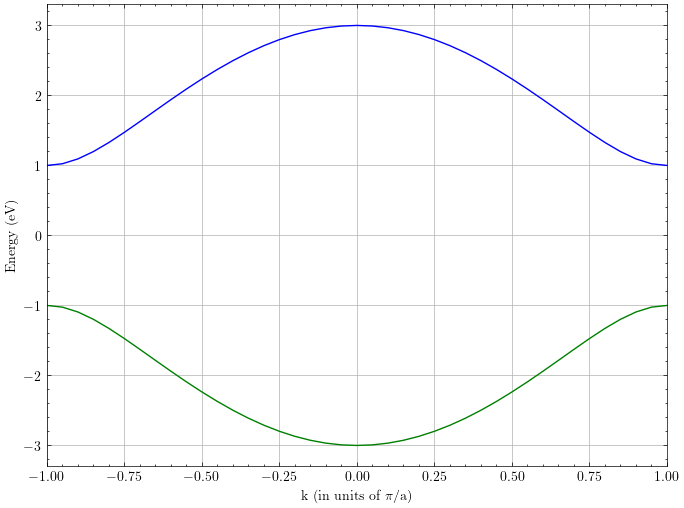

In [10]:
plt.figure(figsize=(8,6))

E_0 = 0
w = 2  # E_ss
v = 1  # E_ss'
k = np.arange(-1, 1.05, 0.05)
E_c = E_0 + np.sqrt(w**2 + v**2 + 2*w*v*np.cos(np.pi*k))
E_v = E_0 - np.sqrt(w**2 + v**2 + 2*w*v*np.cos(np.pi*k))

plt.plot(k, E_c, 'b')
plt.plot(k, E_v, 'g')
plt.xlim(-1,1)
plt.xlabel('k (in units of 'r'$\pi$/a)')
plt.ylabel('Energy (eV)')
plt.grid(True)
plt.savefig("ssh.png")
plt.show()

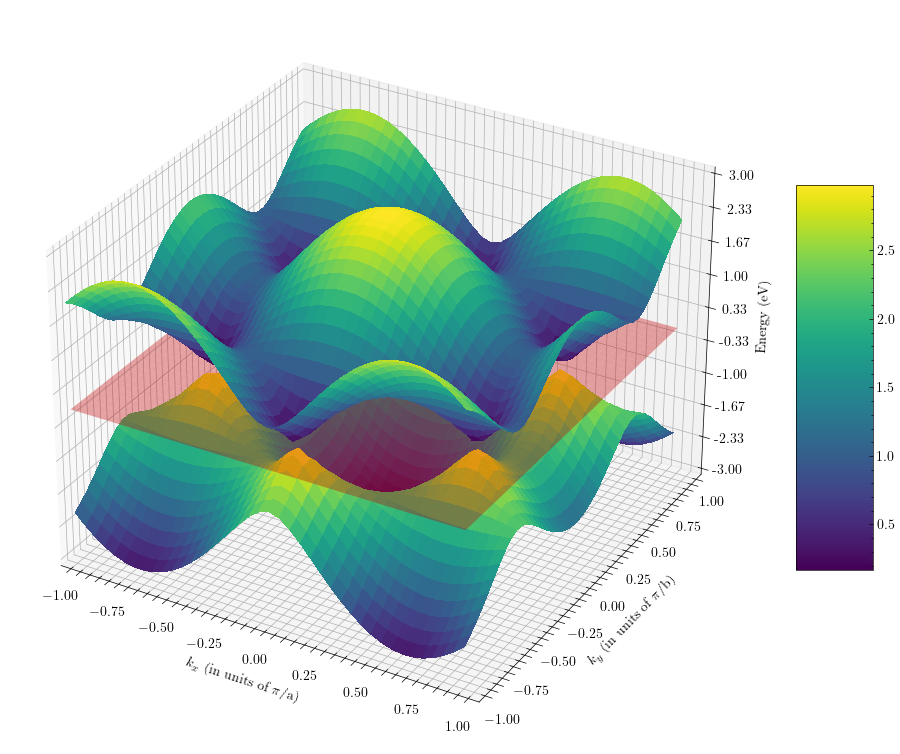

In [8]:
# Graphene band diagram (3D visualisation)

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

t = 1.0
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z_c = t*np.sqrt(1 + 4*np.cos(3*np.pi*X/2)*np.cos(np.sqrt(3)*np.pi*Y/2) + 4*(np.cos(np.sqrt(3)*np.pi*Y/2))**2)
Z_v = -Z_c

surf_c = ax.plot_surface(X, Y, Z_c, cmap=cm.viridis, linewidth=0, antialiased=False)
surf_v = ax.plot_surface(X, Y, Z_v, cmap=cm.viridis, linewidth=0, antialiased=False)

Z_plane = np.zeros_like(Z_c)
ax.plot_surface(X, Y, Z_plane, color='red', alpha=0.35)

# ax.set_zlim(-1.01, 1.01)
ax.set_xlim(-1.01, 1.01)
ax.set_ylim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
# ax.view_init(elev=10, azim=-30)  # to change the orientation
ax.set_zlabel('Energy (eV)')
ax.set_xlabel(r'$k_{x}$ ''(in units of ' r'$\pi$/a)')
ax.set_ylabel(r'$k_{y}$ ''(in units of ' r'$\pi$/b)')

fig.colorbar(surf_c, shrink=0.5, aspect=5)
plt.show()

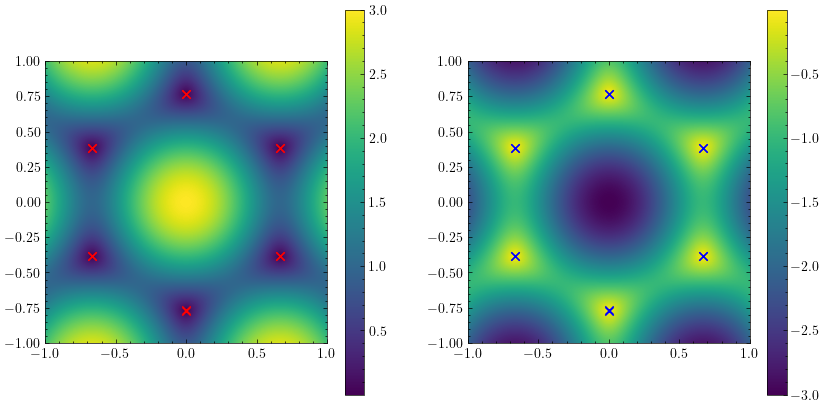

In [7]:
# Location of valleys in graphene bandstructure

t = 1.0

def f(x, y):
  return t*np.sqrt(1 + 4*np.cos(3*np.pi*X/2)*np.cos(np.sqrt(3)*np.pi*Y/2) + 4*(np.cos(np.sqrt(3)*np.pi*Y/2))**2)

x = np.arange(-1, 1, 5e-4)
y = np.arange(-1, 1, 5e-4)
X, Y = np.meshgrid(x, y)

E_c = f(X, Y)
E_v = -E_c

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(E_c, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
axs[1].imshow(E_v, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')

threshold = np.min(E_c) + 1e-3
minima = np.where(E_c <= threshold)

x_min = x[minima[1]]
y_min = y[minima[0]]

for x, y in zip(x_min, y_min):
    axs[0].scatter(x, y, color='red', marker='x')
    axs[1].scatter(x, y, color='blue', marker='x')

fig.colorbar(axs[0].imshow(E_c, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis'), ax=axs[0])
fig.colorbar(axs[1].imshow(E_v, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis'), ax=axs[1])

plt.savefig("graphene_2D.png")
plt.show()

In [2]:
plt.style.use(['science'])

In [3]:
def kitaev(Nsites, mu, t, Delta):
    
    C = np.zeros([Nsites,Nsites])       # Diagonal block of Kitaev H
    S = np.zeros([Nsites,Nsites])       # Cross-diagonal block of Kitaev H
    
    for n in range(Nsites-1):
           S[n+1,n] = -Delta
           S[n,n+1] = Delta
    
    for n in range(Nsites):
        C[n,n] = -mu
        if n < Nsites-1:
            C[n,n+1] = -t
            C[n+1,n] = -t

    H = np.block([[C,S],[np.conjugate(S).T,-C]])
    return H

In [4]:
def kitaev_disorder(Nsites, mu, t, Delta, barrier, sig):
    
    C = np.zeros([Nsites,Nsites])       # Diagonal block of Kitaev H
    S = np.zeros([Nsites,Nsites])       # Cross-diagonal block of Kitaev H
    
    for n in range(Nsites-1):
           S[n+1,n] = -Delta
           S[n,n+1] = Delta

    pot_well = np.zeros(Nsites)
    for n in range(Nsites):
        pot_well[n] = np.exp(-n**2/sig**2)+np.exp(-(Nsites-1-n)**2/sig**2)
        
    pot_well = barrier*((pot_well-np.min(pot_well))/(np.max(pot_well)-np.min(pot_well)))
    
    for n in range(Nsites):
        C[n,n] = -mu+pot_well[n]
        if n < Nsites-1:
            C[n,n+1] = -t
            C[n+1,n] = -t

    H = np.block([[C,S],[np.conjugate(S).T,-C]])
    return H

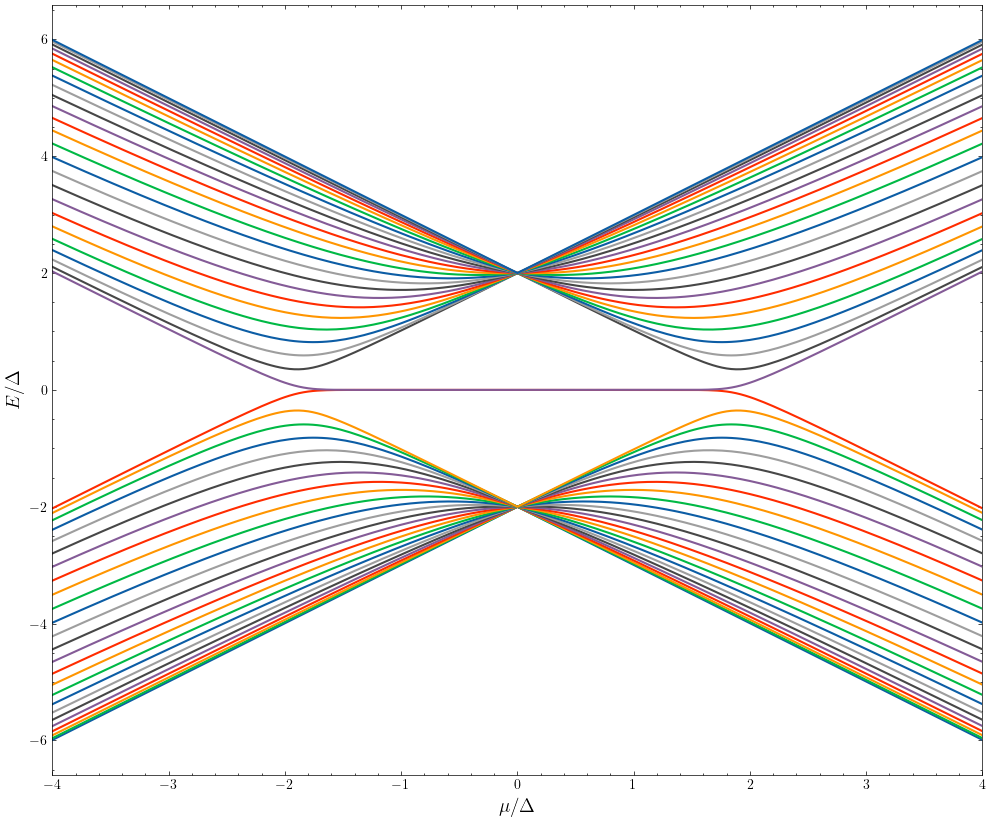

In [35]:
# Energy spectrum of a finite Kitaev chain

plt.figure(figsize=(12,10))

mu = 0.0
Delta = 2.0
t = 1.0*Delta
Nsites = 25

mu_vals = np.linspace(-4*Delta,4*Delta,201)
E_vals = np.zeros([len(mu_vals),2*Nsites])

for i in range(len(mu_vals)):
    E_vals[i] = la.eigh(kitaev(Nsites, mu_vals[i], t, Delta))[0]

#plt.title("Energy spectrum as a function of $\mu/\Delta$ (N = 25)")
for i in range(2*Nsites):
    plt.plot(mu_vals/Delta,E_vals[:,i]/Delta,linewidth=1.5)

plt.ylabel('$E/\Delta$',fontsize=14)
plt.xlabel('$\mu/\Delta$',fontsize=14)
plt.xlim(-mu_vals[200]/Delta,mu_vals[200]/Delta)
plt.savefig("KC.png")
plt.show()

In [23]:
## Slider does not work in Jupyter environment for some reason, does work in Colab Notebook

# import numpy as np
# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display
# import scipy.linalg as la

# def kitaev(Nsites, mu, t, Delta):
#     C = np.zeros([Nsites, Nsites])       # Diagonal block of Kitaev H
#     S = np.zeros([Nsites, Nsites])       # Cross-diagonal block of Kitaev H
    
#     for n in range(Nsites - 1):
#         S[n + 1, n] = -Delta
#         S[n, n + 1] = Delta
    
#     for n in range(Nsites):
#         C[n, n] = -mu
#         if n < Nsites - 1:
#             C[n, n + 1] = -t
#             C[n + 1, n] = -t

#     H = np.block([[C, S], [np.conjugate(S).T, -C]])
#     return H

# Nsites = 25
# t = 2.0
# Delta = 2.0
# mu_vals = np.linspace(0, 4, 101)
# energy_vals = np.zeros([len(mu_vals), 2 * Nsites])

# for i in range(len(mu_vals)):
#     energy_vals[i] = la.eigh(kitaev(Nsites, mu_vals[i], t, Delta))[0]

# def update_plot(mu):
#     plt.figure(figsize=(10, 6))
#     plt.title("Energy spectrum as a function of $\mu/t$ (N = 25)")
#     for i in range(2*Nsites):
#         plt.plot(mu_vals/t, energy_vals[:, i])
#     plt.axvline(x=mu, color='r', linestyle='--')
#     plt.ylabel('Energy')
#     plt.xlabel('$\mu/t$')
#     plt.xlim(-0.1,mu_vals[100]/t)
#     plt.grid(True)
#     plt.show()

# mu_slider = widgets.FloatSlider(value=0, min=0, max=4/t, step=0.01, description='μ')

# widgets.interact(update_plot, mu=mu_slider)
# display(mu_slider)

In [72]:
# LINEAR TRANSPORT REGIME

In [87]:
plt.style.use(['science','ieee'])

In [88]:
def xj(mu, m, p, j):

    Rplus = (-mu + np.sqrt(mu**2-4*m*p+0j))/(2*p)
    Rminus = (-mu - np.sqrt(mu**2-4*m*p+0j))/(2*p)
    denom = Rplus-Rminus

    if np.isclose(denom, 0):
        xj = (j+1)*(-mu/2*p)**j
        return xj
        
    xj = (Rplus**(j+1)-Rminus**(j+1))/denom
    return xj

In [89]:
def polyq(p, gammaL, gammaR, s, Nsites, x0, x1, x2):
    
    polyq = p**(Nsites-2)*(s*p**2*x0 + 1j*p*x1*(s*gammaL-gammaR) + x2*gammaL*gammaR)
    return abs(polyq)

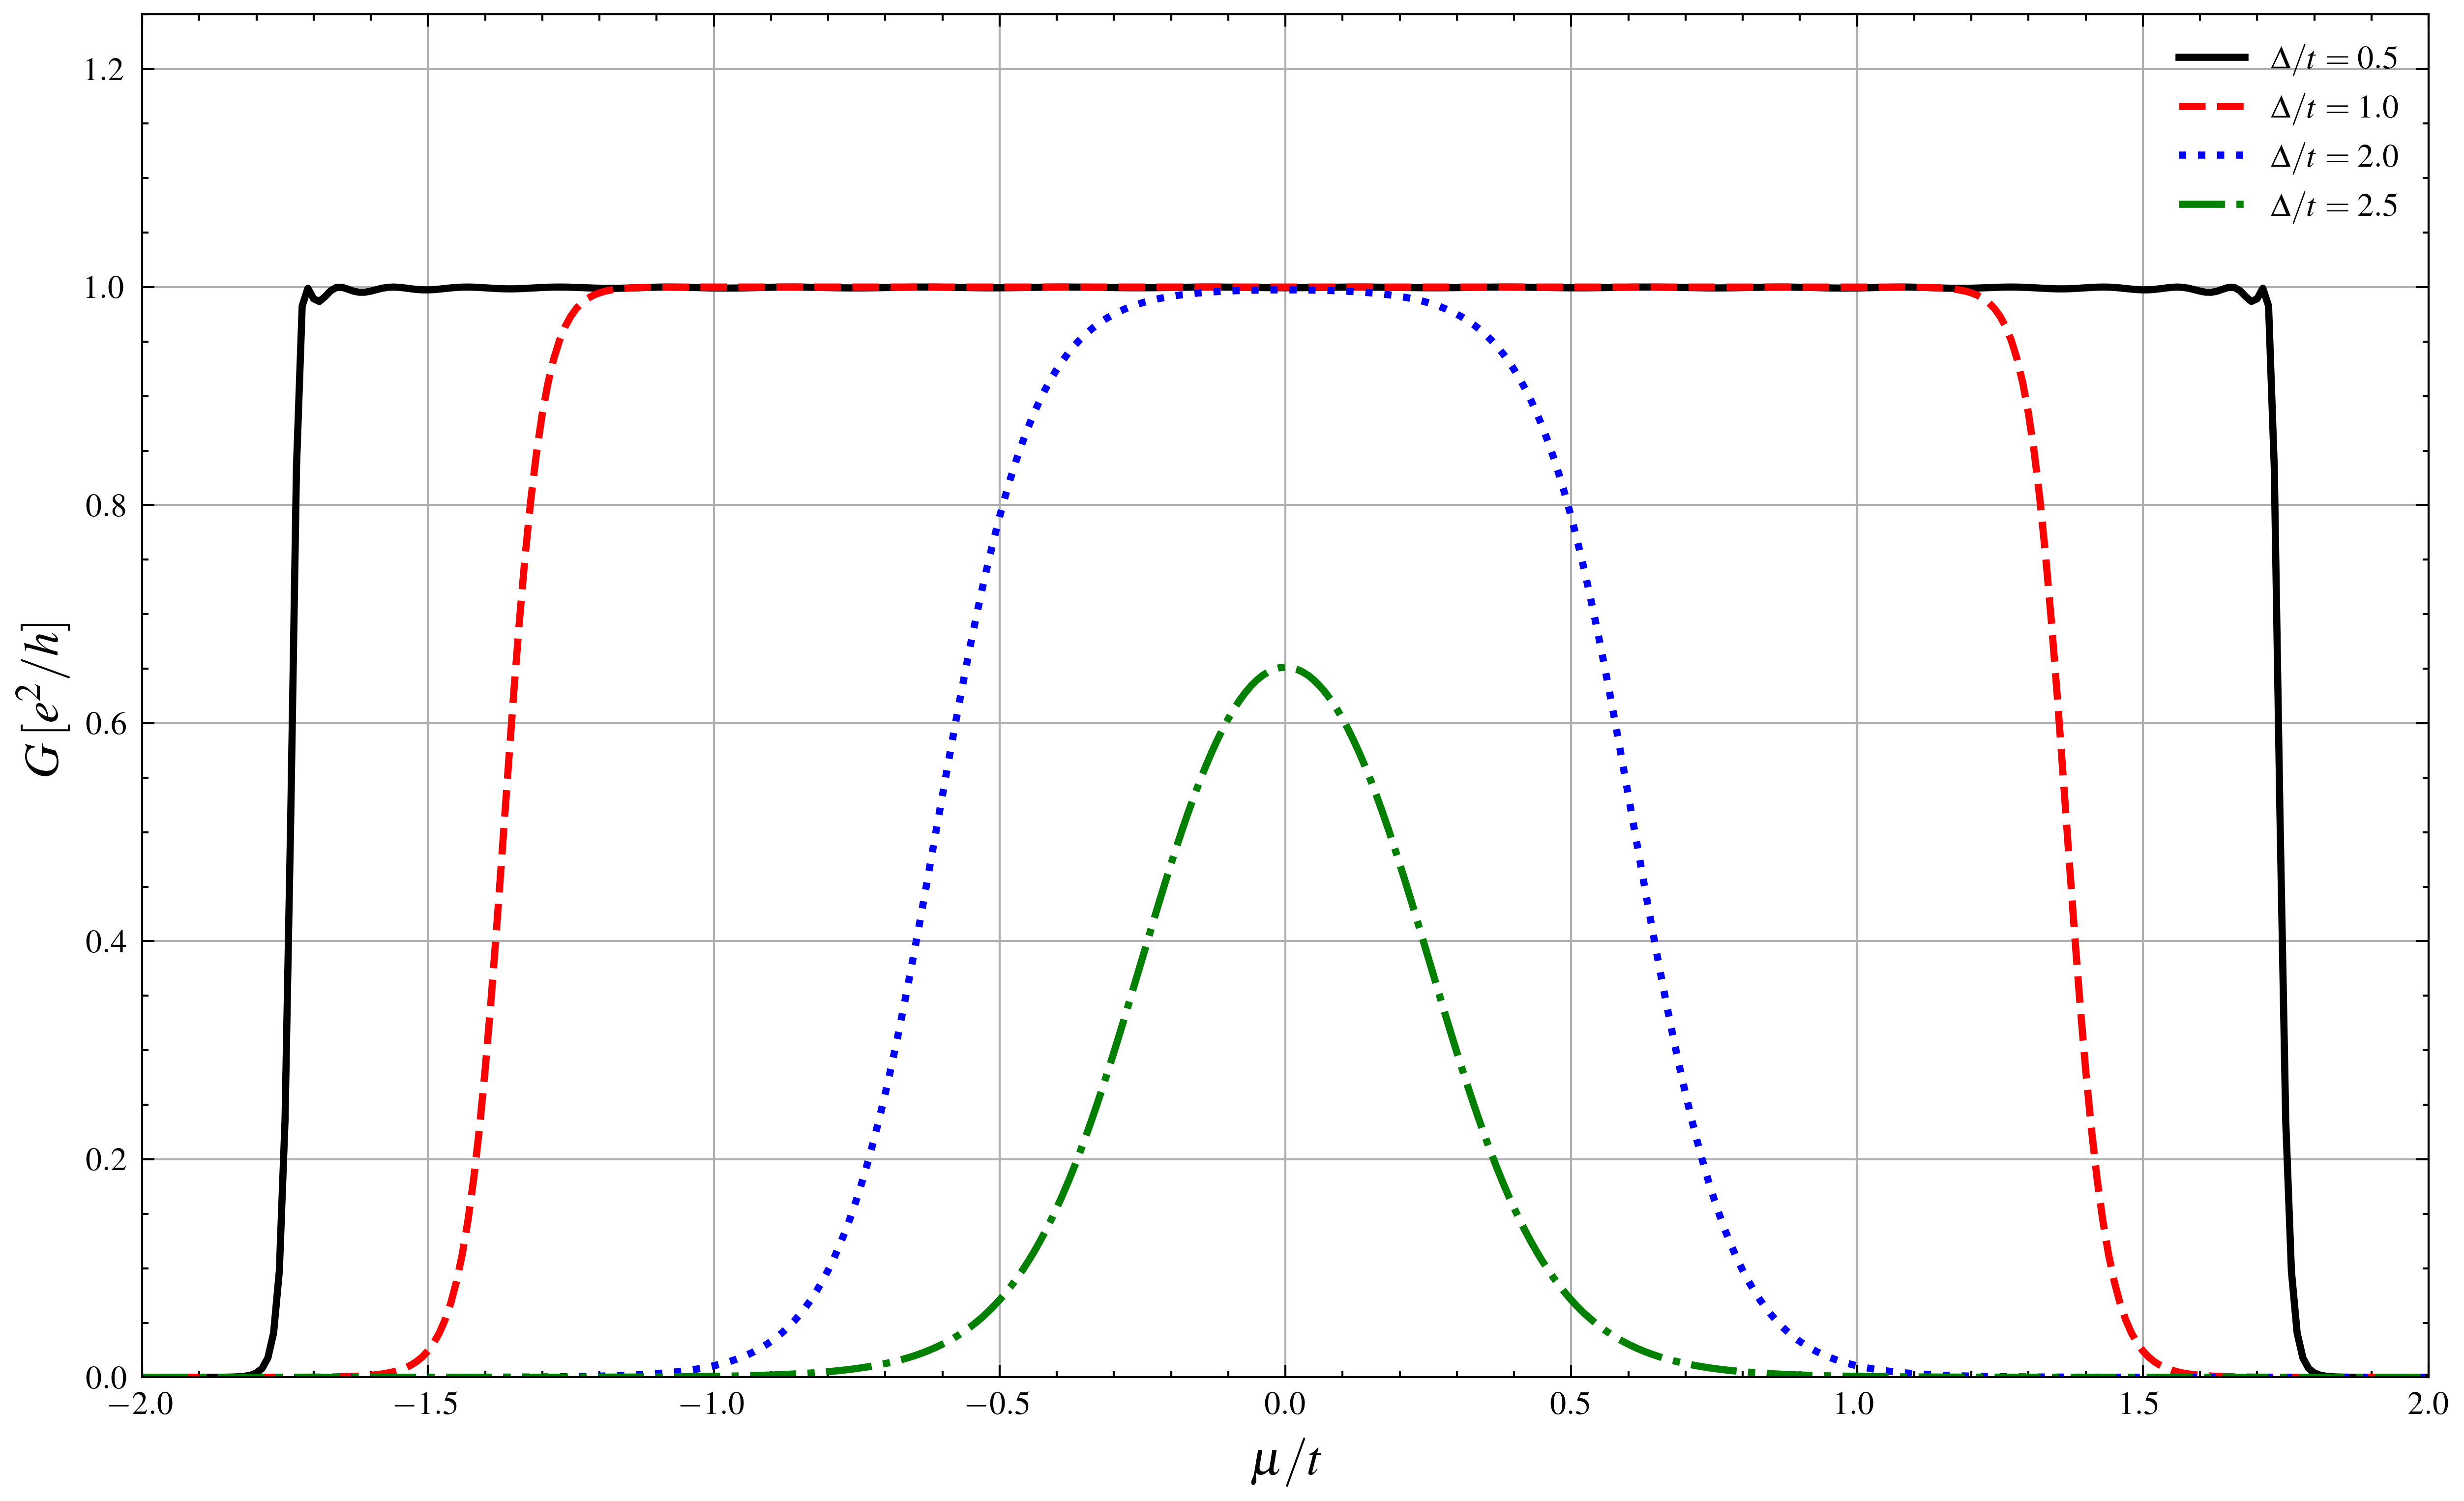

In [90]:
# Linear transport in Kitaev chain (T -> 0 K, V -> 0)

plt.figure(figsize=(10,6))

e = 1.0
h = 1.0
mu = 0.0
t = 2.0
Delta = 2.0
Nsites = 20
gammaL = 1e-3*t
gammaR = 1e-3*t  
# p = t+Delta
# m = t-Delta

mu_vals = np.linspace(-2*t,2*t,401)
Delta_vals = np.array([0.5*t, t, 2*t, 2.5*t])

p_vals = np.zeros(len(Delta_vals))
m_vals = np.zeros(len(Delta_vals))
GD_vals = np.zeros([len(mu_vals), len(Delta_vals)])    # direct transport
GA_vals = np.zeros([len(mu_vals), len(Delta_vals)])    # Andreev reflection
G_vals = np.zeros([len(mu_vals), len(Delta_vals)])     # total conductance

for i in range(len(Delta_vals)):
    p_vals[i] = t + Delta_vals[i]
    m_vals[i] = t - Delta_vals[i]
    
    for j in range(len(mu_vals)):
        x0 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites)
        x1 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites-1)
        x2 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites-2)

        qplus = polyq(p_vals[i], gammaL, gammaR, 1, Nsites, x0, x1, x2)
        qminus = polyq(p_vals[i], gammaL, gammaR, -1, Nsites, x0, x1, x2) 
        
        GD_vals[j][i] = ((gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)/(qplus**2+gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)**2)*(qminus**2)
        GA_vals[j][i] = ((gammaL**2*gammaR**2*(p_vals[i]**(2*Nsites-2)-m_vals[i]**(2*Nsites-2))**2)/(qplus**2+gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)**2)
        G_vals[j][i] = GD_vals[j][i] + GA_vals[j][i]

#plt.title("Conductance in units of $e^2/h$ for $\gamma_{L,R}/t = 0.001$, $N = 20$")
for m in range(len(Delta_vals)):
    interp_G = interp1d(mu_vals,G_vals[:,m],kind='cubic')
    G = interp_G(mu_vals)
    plt.plot(mu_vals/t,G,linewidth=1.75,label=f'$\Delta/t = {Delta_vals[m]/t}$')
plt.ylabel('$G \: [e^{2}/h]$',fontsize=12)
plt.xlabel('$\mu/t$',fontsize=12)
plt.xlim(-mu_vals[400]/t,mu_vals[400]/t)
plt.ylim(-0.0,1.25)
plt.grid(True)
plt.legend(loc='upper right')
#plt.savefig("KC_conductance.png")
plt.show()

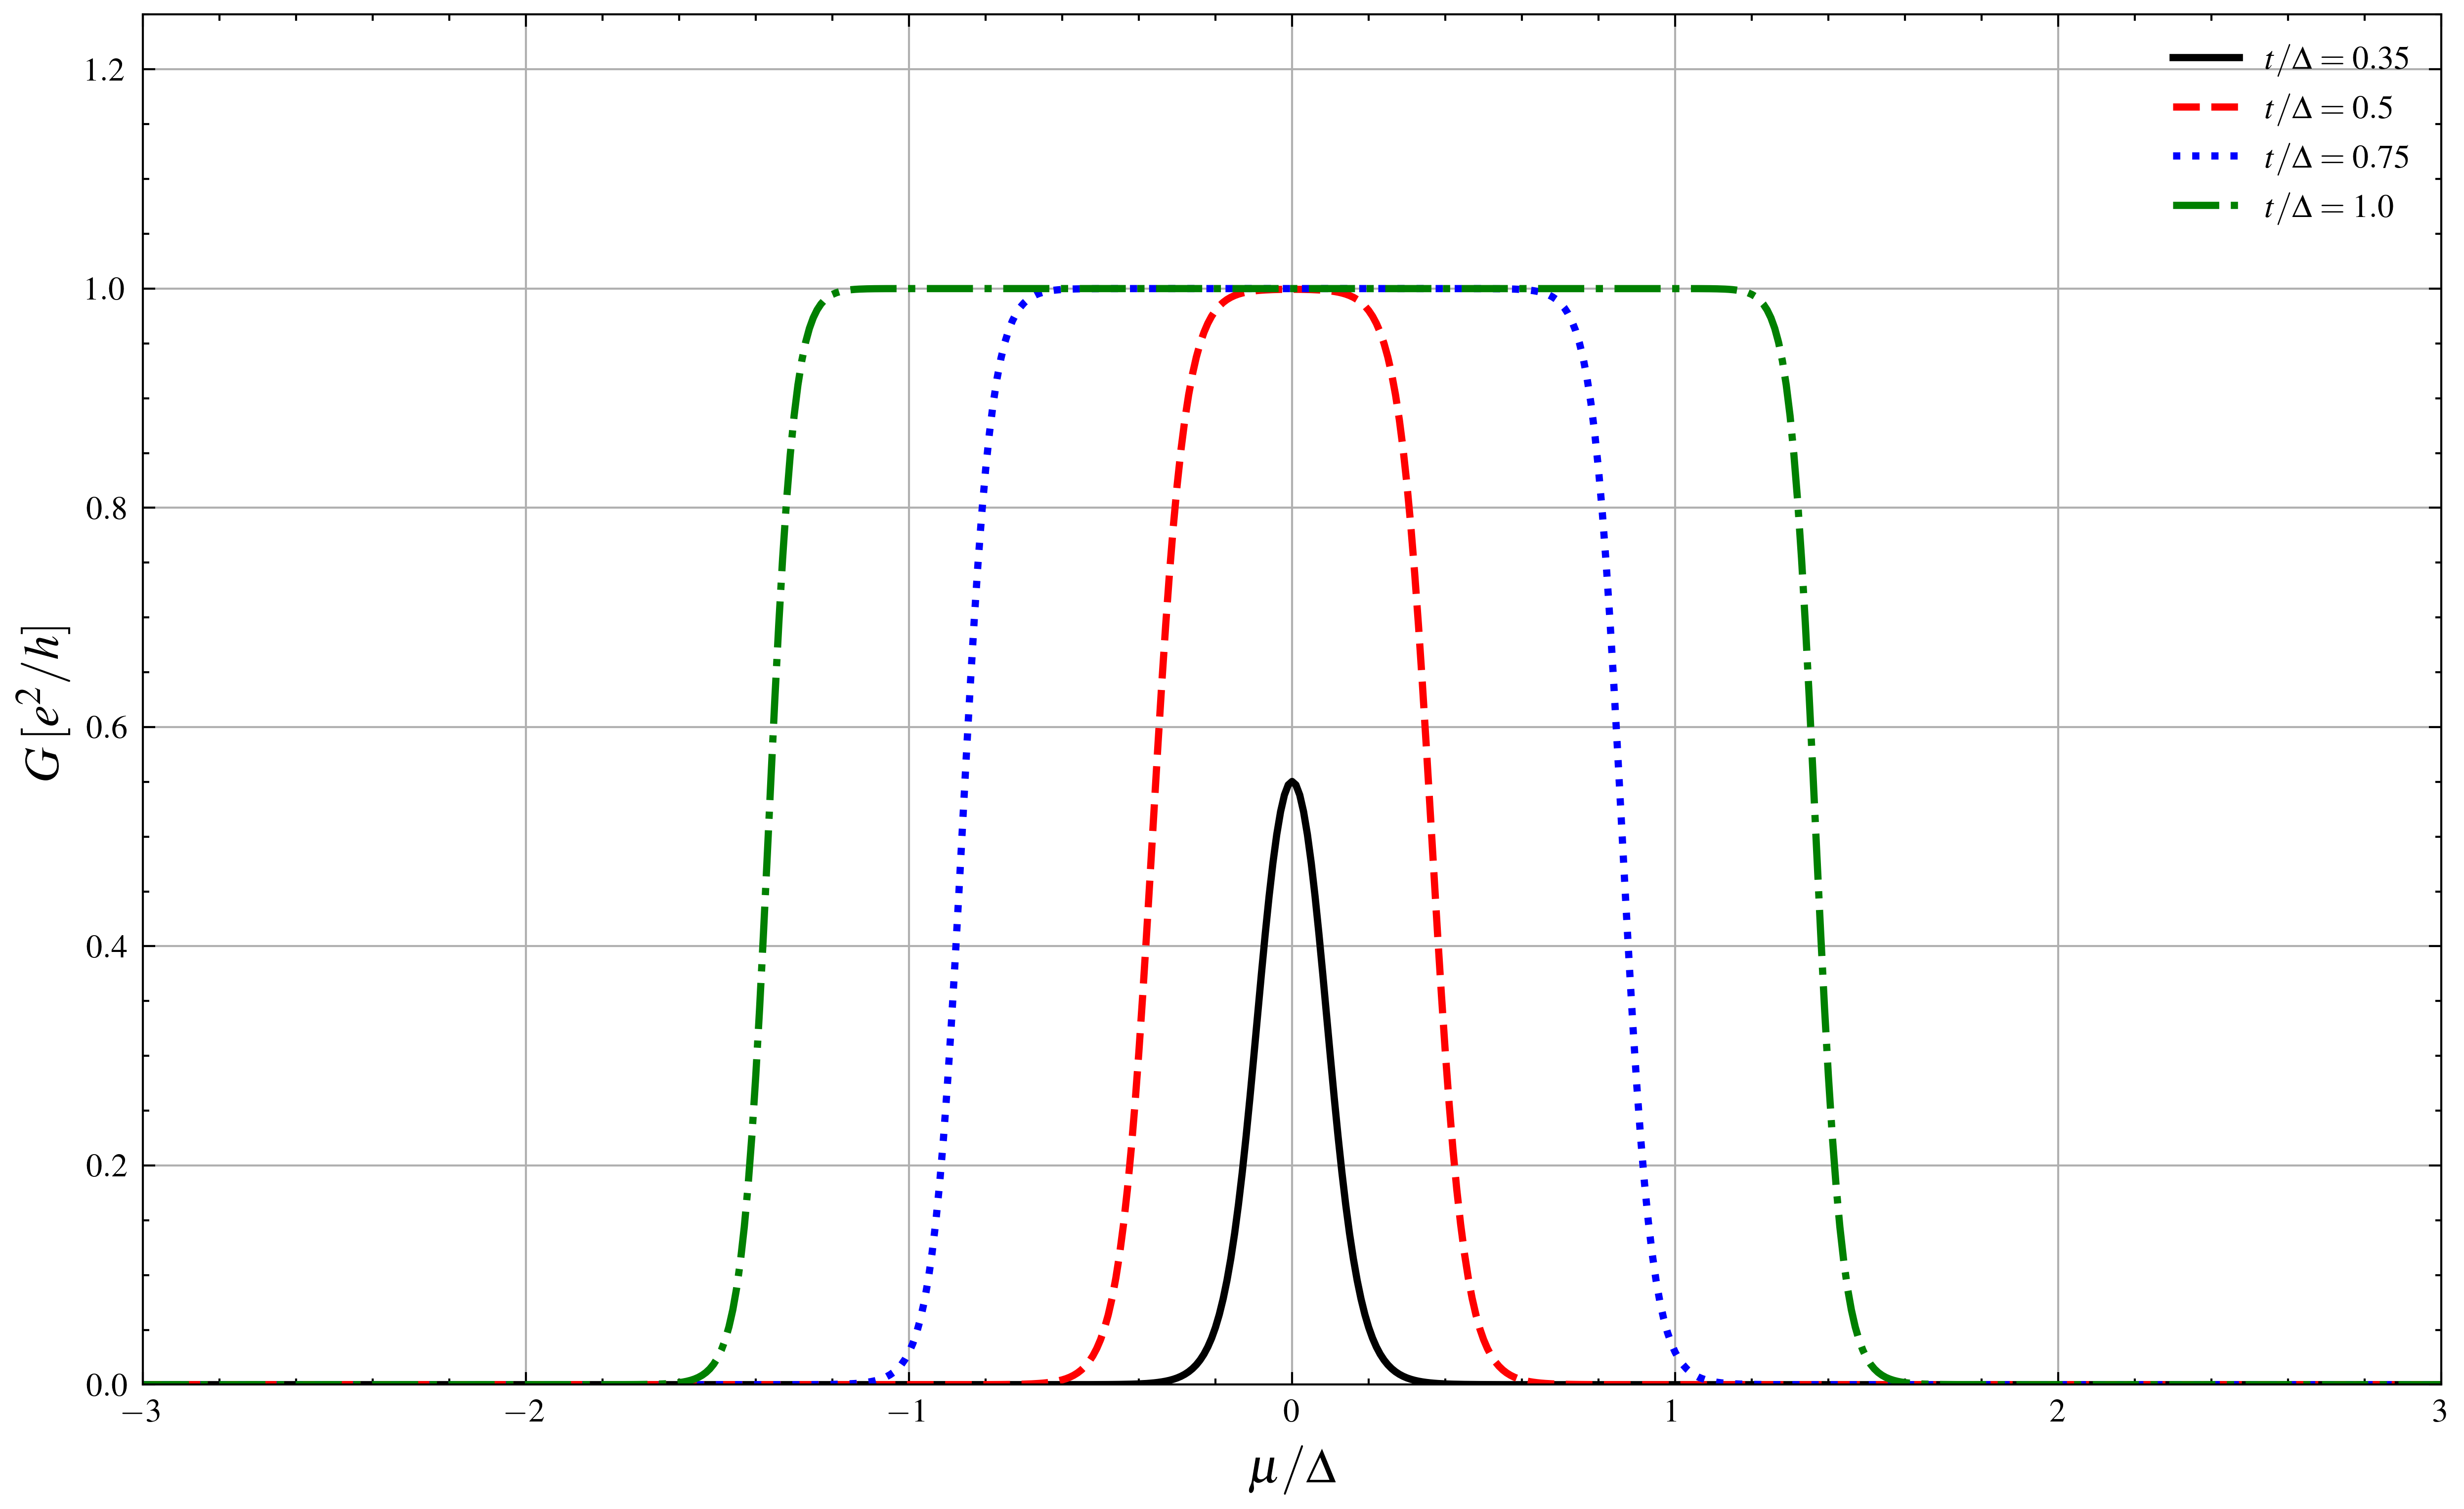

In [94]:
# Linear transport in Kitaev chain (T -> 0 K, V -> 0)

plt.figure(figsize=(10,6))

e = 1.0
h = 1.0
mu = 0.0
t = 2.0
Delta = 2.0
Nsites = 20
gammaL = 1e-3*Delta
gammaR = 1e-3*Delta  
# p = t+Delta
# m = t-Delta

mu_vals = np.linspace(-3*Delta,3*Delta,601)
t_vals = np.array([0.35*Delta, 0.5*Delta, 0.75*Delta, Delta])

p_vals = np.zeros(len(t_vals))
m_vals = np.zeros(len(t_vals))
GD_vals = np.zeros([len(mu_vals), len(t_vals)])    # direct transport
GA_vals = np.zeros([len(mu_vals), len(t_vals)])    # Andreev reflection
G_vals = np.zeros([len(mu_vals), len(t_vals)])     # total conductance

for i in range(len(t_vals)):
    p_vals[i] = t_vals[i] + Delta
    m_vals[i] = t_vals[i] - Delta
    
    for j in range(len(mu_vals)):
        x0 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites)
        x1 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites-1)
        x2 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites-2)

        qplus = polyq(p_vals[i], gammaL, gammaR, 1, Nsites, x0, x1, x2)
        qminus = polyq(p_vals[i], gammaL, gammaR, -1, Nsites, x0, x1, x2) 
        
        GD_vals[j][i] = ((gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)/(qplus**2+gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)**2)*(qminus**2)
        GA_vals[j][i] = ((gammaL**2*gammaR**2*(p_vals[i]**(2*Nsites-2)-m_vals[i]**(2*Nsites-2))**2)/(qplus**2+gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)**2)
        G_vals[j][i] = GD_vals[j][i] + GA_vals[j][i]

#plt.title("Conductance in units of $e^2/h$ for $\gamma_{L,R}/t = 0.001$, $N = 20$")
for m in range(len(t_vals)):
    interp_G = interp1d(mu_vals,G_vals[:,m],kind='cubic')
    G = interp_G(mu_vals)
    plt.plot(mu_vals/Delta,G,linewidth=1.75,label=f'$t/\Delta = {t_vals[m]/Delta}$')
plt.ylabel('$G \: [e^{2}/h]$',fontsize=12)
plt.xlabel('$\mu/\Delta$',fontsize=12)
plt.xlim(-mu_vals[600]/Delta,mu_vals[600]/Delta)
plt.ylim(-0.0,1.25)
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("KC_conductance.png")
plt.show()

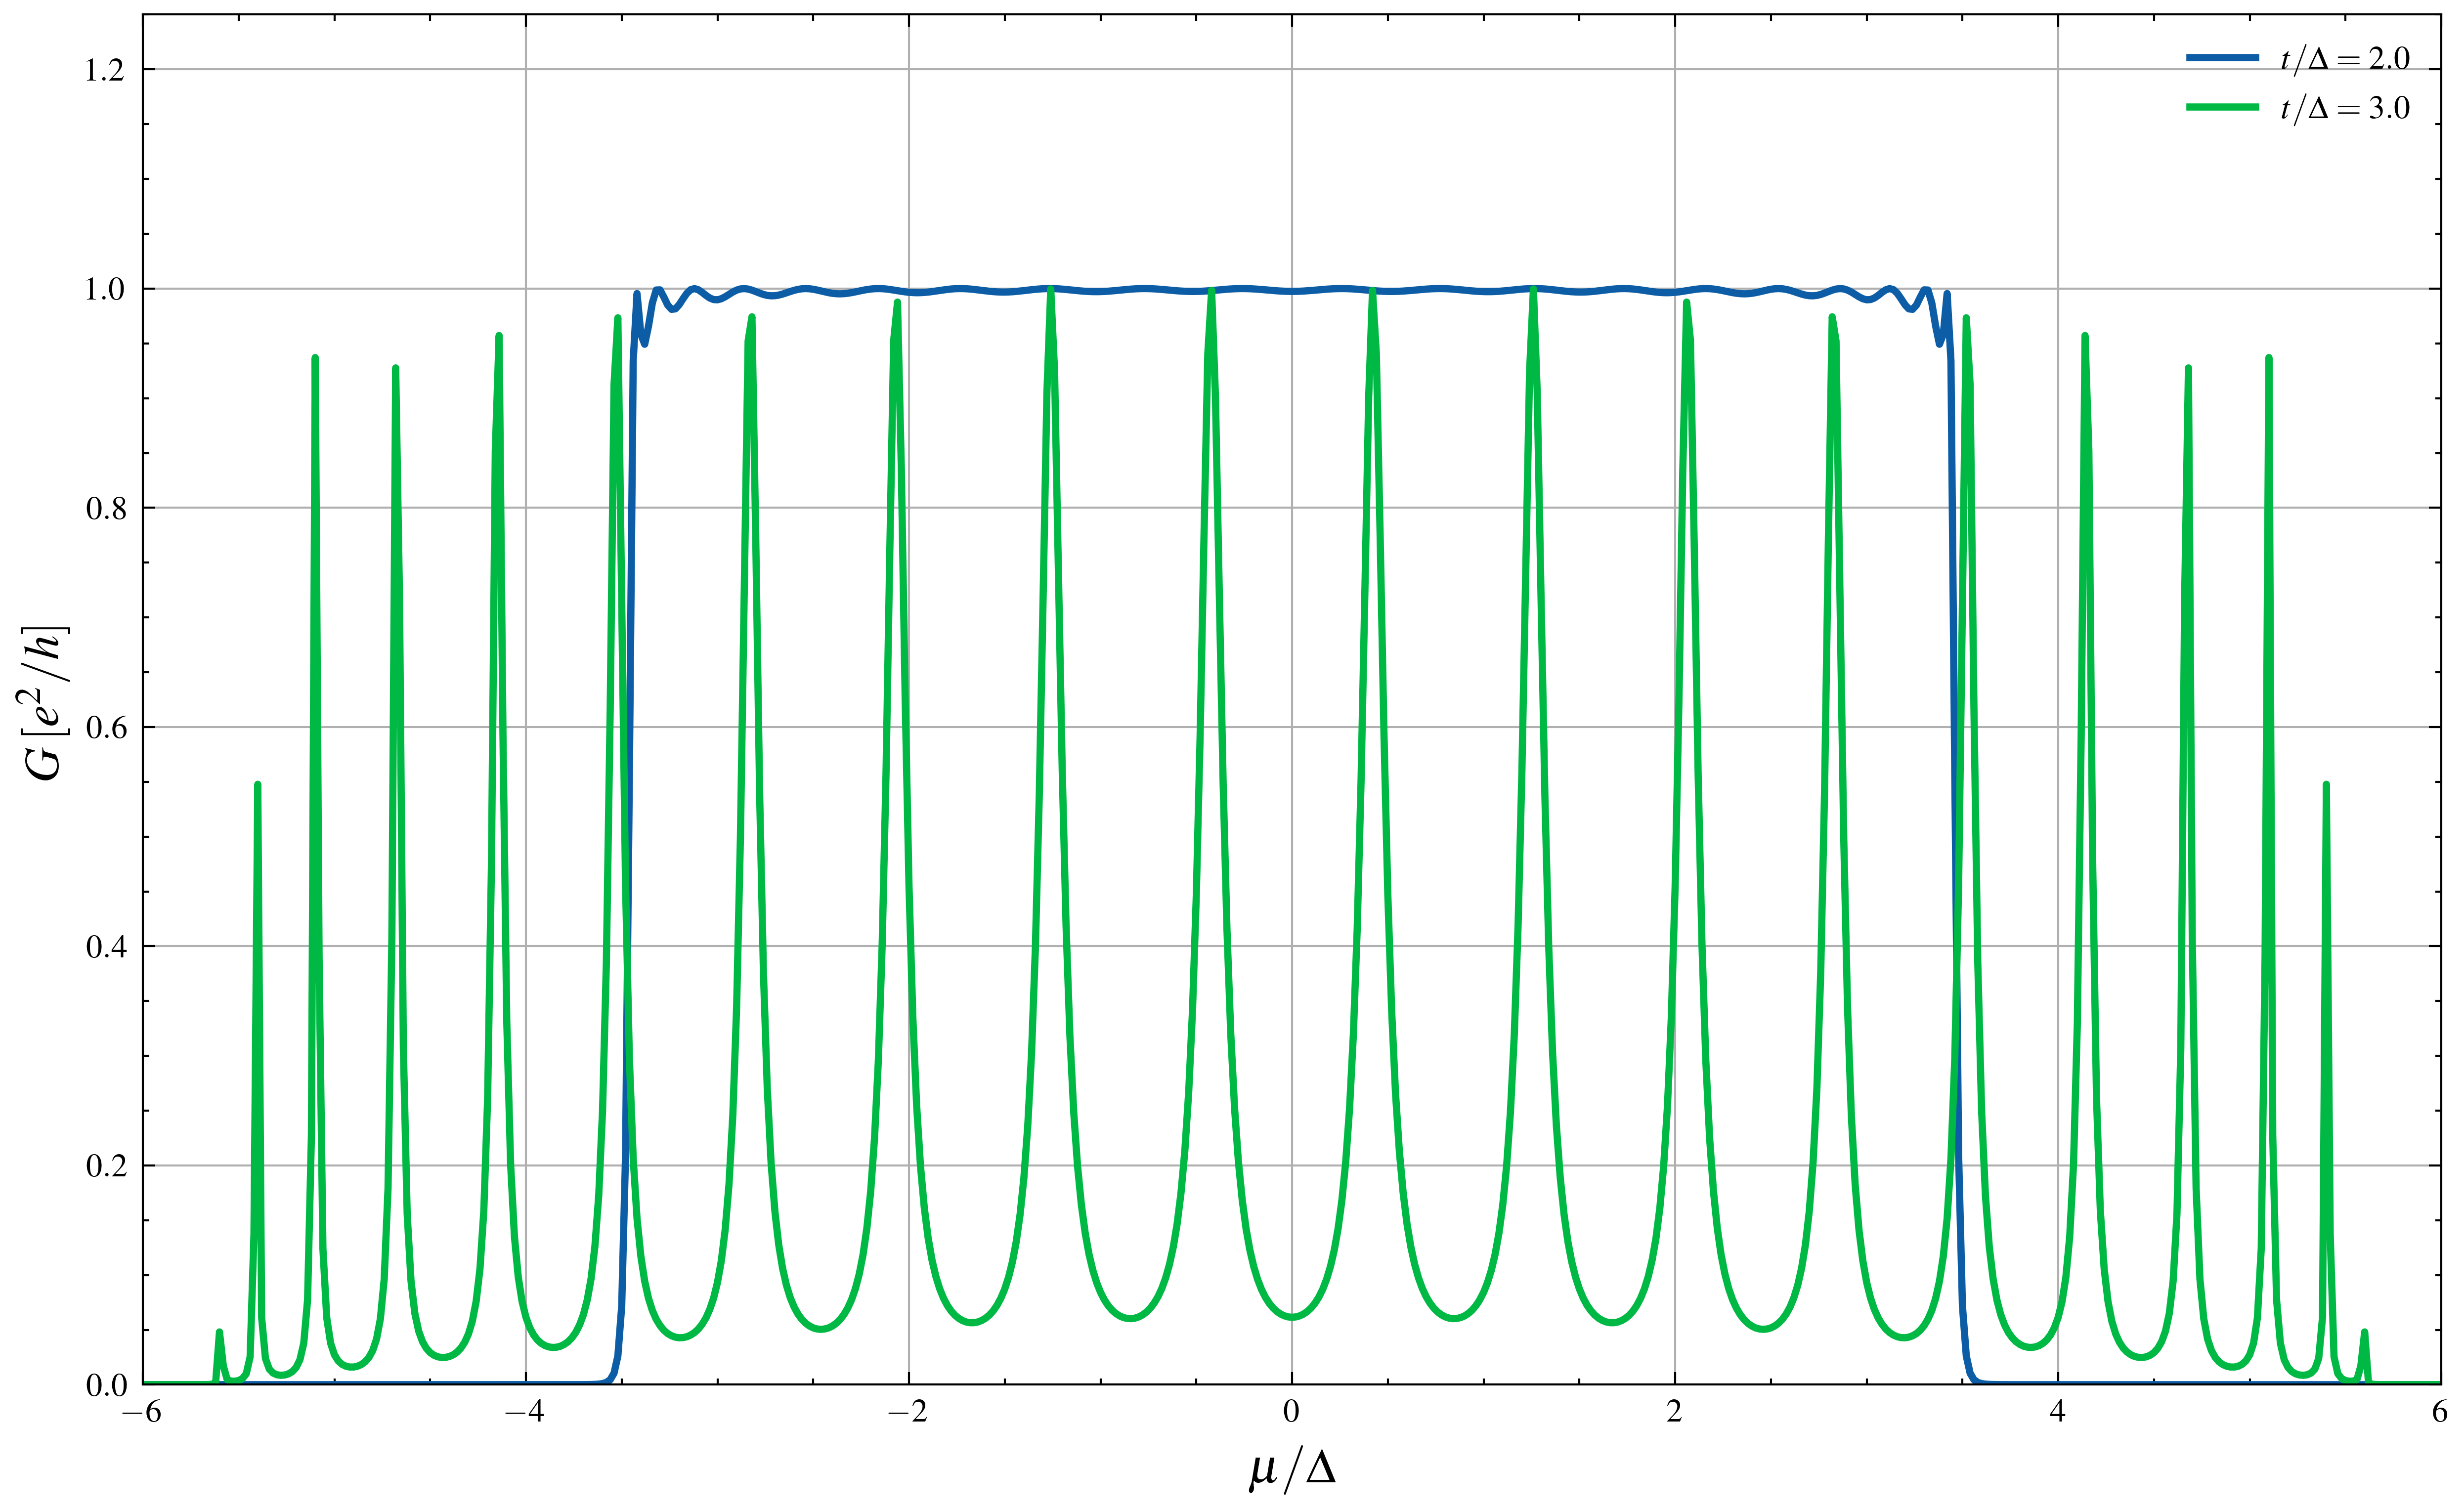

In [92]:
# Linear transport in Kitaev chain (T -> 0 K, V -> 0)
plt.style.use(['science'])
plt.figure(figsize=(10,6))

e = 1.0
h = 1.0
mu = 0.0
t = 2.0
Delta = 2.0
Nsites = 20
gammaL = 1e-3*t
gammaR = 1e-3*t  
# p = t+Delta
# m = t-Delta

mu_vals = np.linspace(-6*Delta,6*Delta,601)
t_vals = np.array([2*Delta,3*Delta])

p_vals = np.zeros(len(t_vals))
m_vals = np.zeros(len(t_vals))
GD_vals = np.zeros([len(mu_vals), len(t_vals)])    # direct transport
GA_vals = np.zeros([len(mu_vals), len(t_vals)])    # Andreev reflection
G_vals = np.zeros([len(mu_vals), len(t_vals)])     # total conductance

for i in range(len(t_vals)):
    p_vals[i] = t_vals[i] + Delta
    m_vals[i] = t_vals[i] - Delta
    
    for j in range(len(mu_vals)):
        x0 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites)
        x1 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites-1)
        x2 = xj(mu_vals[j], m_vals[i], p_vals[i], Nsites-2)

        qplus = polyq(p_vals[i], gammaL, gammaR, 1, Nsites, x0, x1, x2)
        qminus = polyq(p_vals[i], gammaL, gammaR, -1, Nsites, x0, x1, x2) 
        
        GD_vals[j][i] = ((gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)/(qplus**2+gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)**2)*(qminus**2)
        GA_vals[j][i] = ((gammaL**2*gammaR**2*(p_vals[i]**(2*Nsites-2)-m_vals[i]**(2*Nsites-2))**2)/(qplus**2+gammaL*gammaR*(p_vals[i]**(Nsites-1)+m_vals[i]**(Nsites-1))**2)**2)
        G_vals[j][i] = GD_vals[j][i] + GA_vals[j][i]

#plt.title("Conductance in units of $e^2/h$ for $\gamma_{L,R}/t = 0.001$, $N = 20$")
for m in range(len(t_vals)):
    interp_G = interp1d(mu_vals,G_vals[:,m],kind='cubic')
    G = interp_G(mu_vals)
    plt.plot(mu_vals/Delta,G,linewidth=1.75,label=f'$t/\Delta = {t_vals[m]/Delta}$')
plt.ylabel('$G \: [e^{2}/h]$',fontsize=12)
plt.xlabel('$\mu/\Delta$',fontsize=12)
plt.xlim(-mu_vals[600]/Delta,mu_vals[600]/Delta)
plt.ylim(-0.0,1.25)
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("KC_resonant_modes.png")
plt.show()

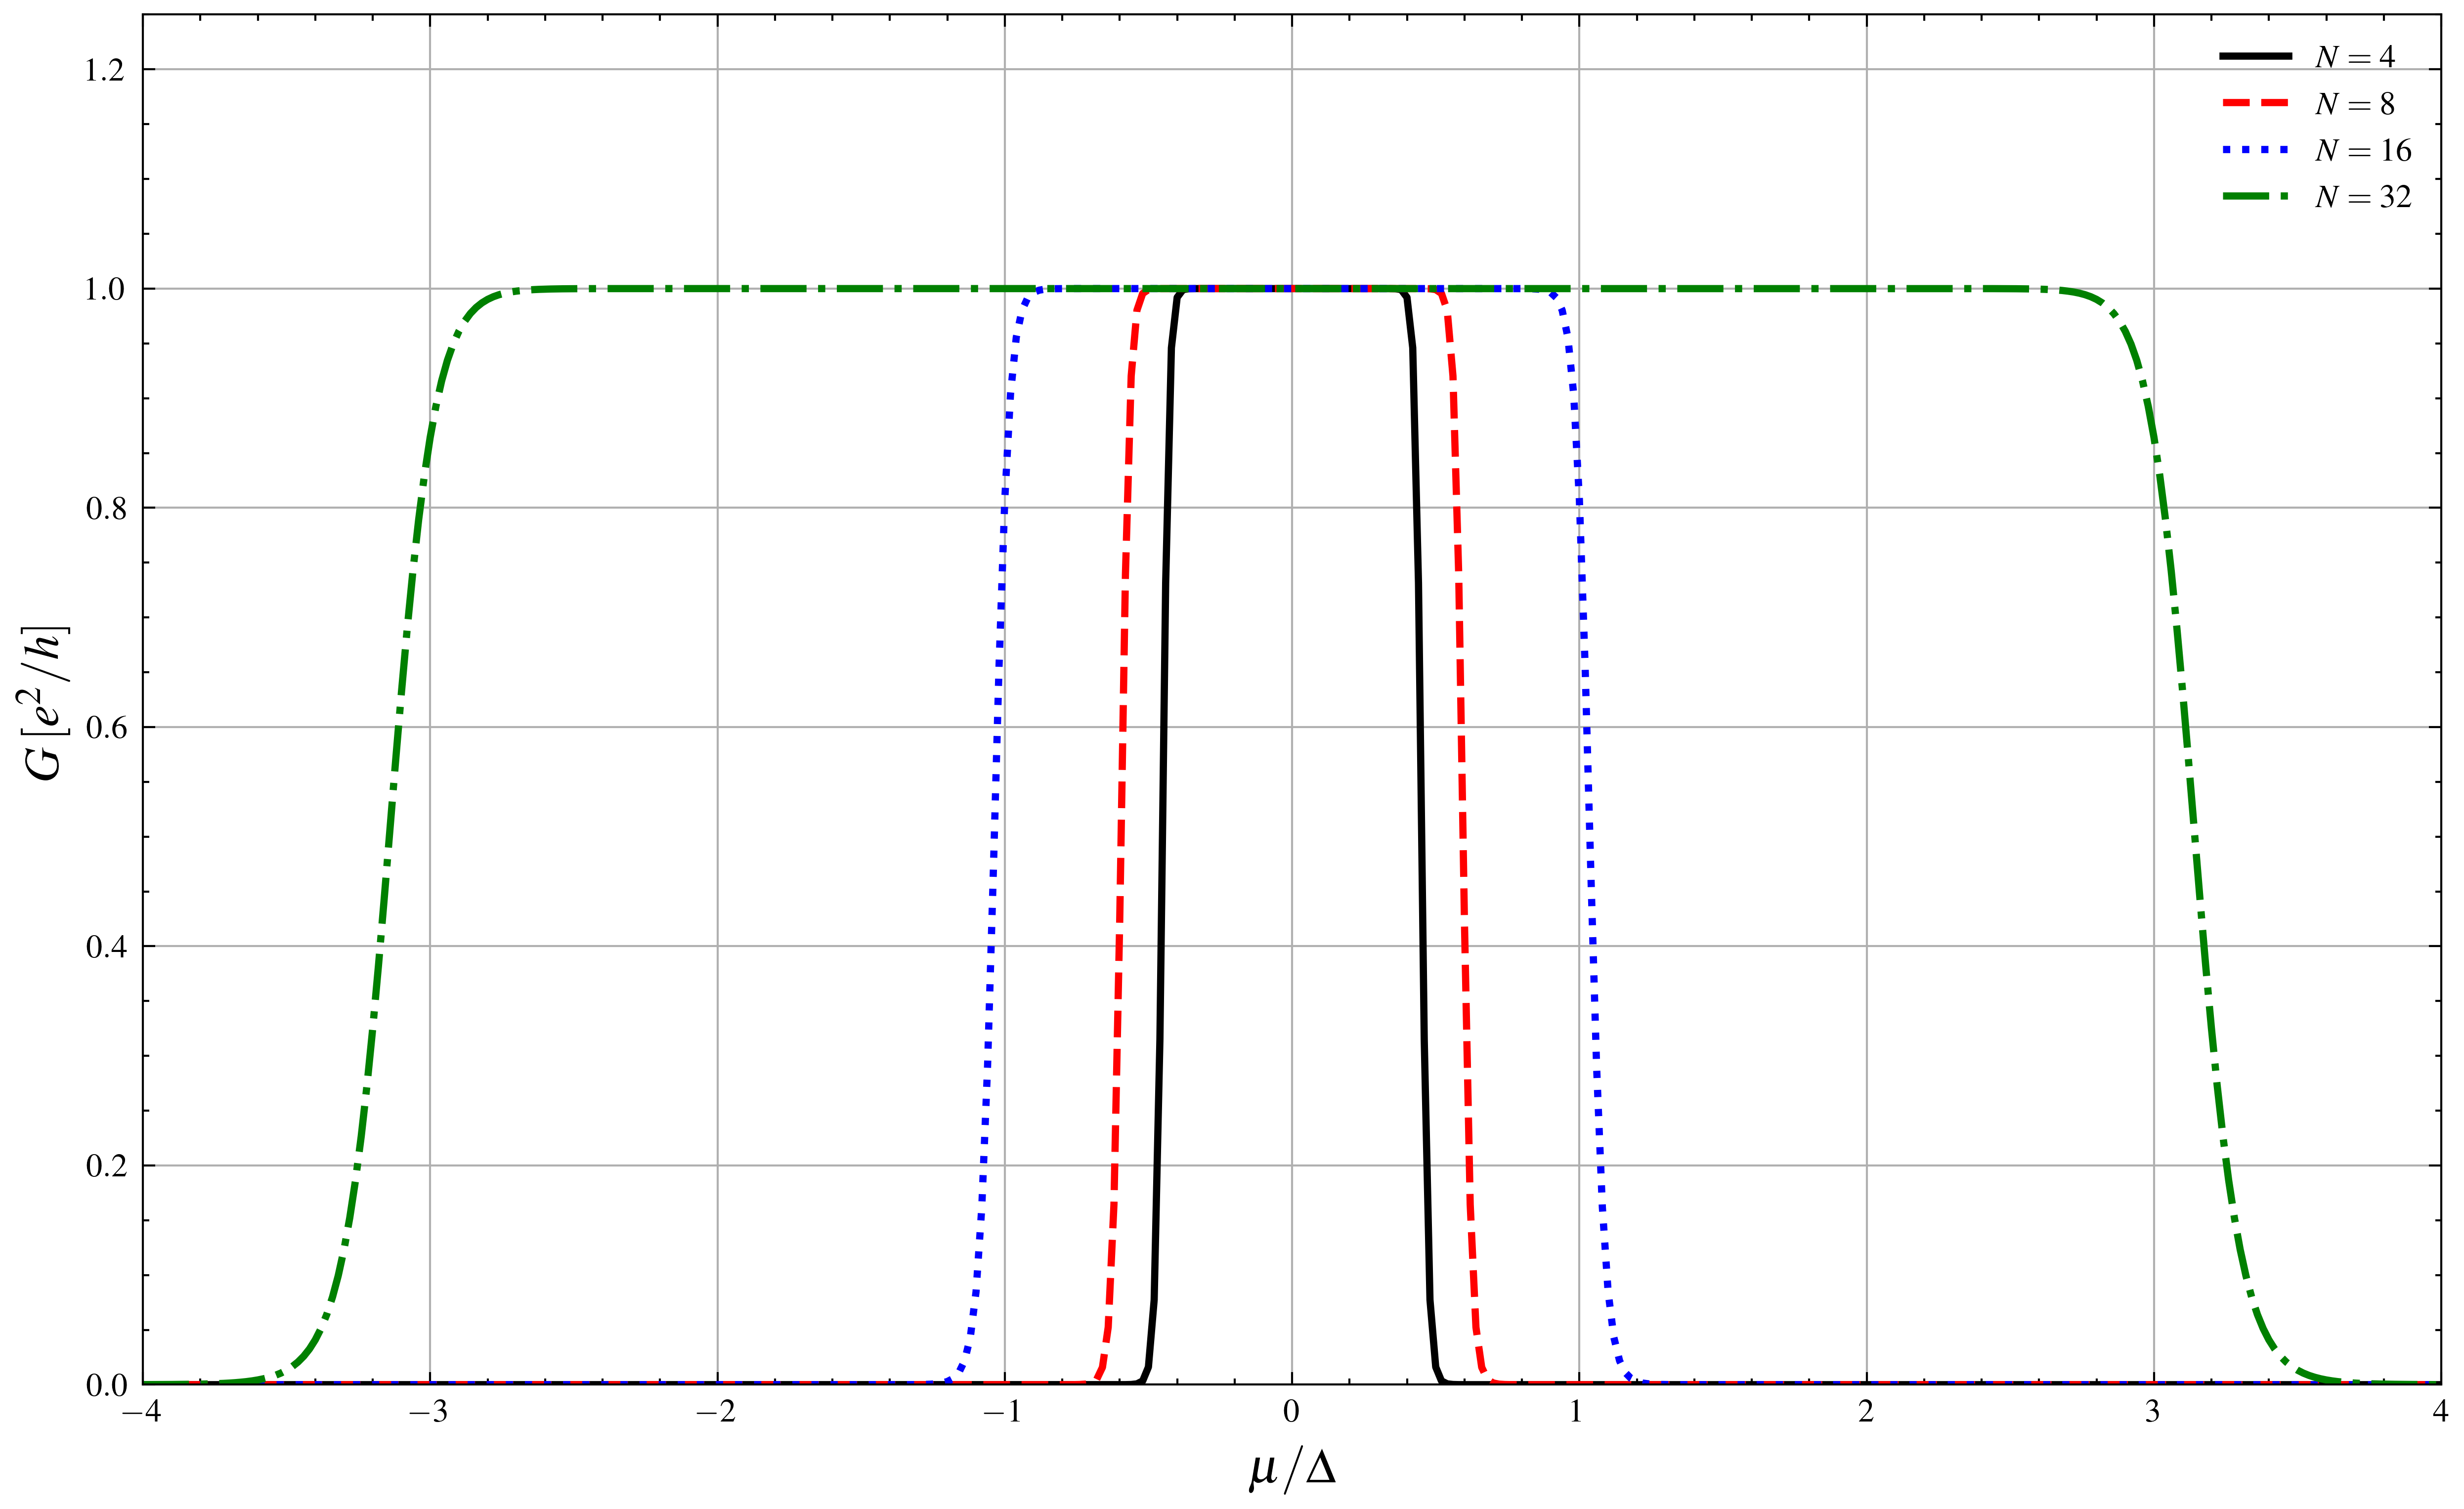

In [93]:
# Linear transport in Kitaev chain (T -> 0 K, V -> 0)
plt.style.use(['science','ieee'])
plt.figure(figsize=(10,6))

e = 1.0
h = 1.0
mu = 0.0
t = 2.0
Delta = 2.0
Nsites = 20
gammaL = 1e-3*Delta
gammaR = 1e-3*Delta  
p = t+Delta
m = t-Delta

mu_vals = np.linspace(-4*Delta,4*Delta,401)
Nsites_vals = np.array([4, 8, 16, 32])

GD_vals = np.zeros([len(mu_vals), len(Nsites_vals)])    # direct transport
GA_vals = np.zeros([len(mu_vals), len(Nsites_vals)])    # Andreev reflection
G_vals = np.zeros([len(mu_vals), len(Nsites_vals)])     # total conductance

for i in range(len(Nsites_vals)):
    
    for j in range(len(mu_vals)):
        x0 = xj(mu_vals[j], m, p, Nsites)
        x1 = xj(mu_vals[j], m, p, Nsites-1)
        x2 = xj(mu_vals[j], m, p, Nsites-2)

        qplus = polyq(p, gammaL, gammaR, 1, Nsites, x0, x1, x2)
        qminus = polyq(p, gammaL, gammaR, -1, Nsites, x0, x1, x2) 
        
        GD_vals[j][i] = ((gammaL*gammaR*(p**(Nsites_vals[i]-1)+m**(Nsites_vals[i]-1))**2)/(qplus**2+gammaL*gammaR*(p**(Nsites_vals[i]-1)+m**(Nsites_vals[i]-1))**2)**2)*(qminus**2)
        GA_vals[j][i] = ((gammaL**2*gammaR**2*(p**(2*Nsites_vals[i]-2)-m**(2*Nsites_vals[i]-2))**2)/(qplus**2+gammaL*gammaR*(p**(Nsites_vals[i]-1)+m**(Nsites_vals[i]-1))**2)**2)
        G_vals[j][i] = GD_vals[j][i] + GA_vals[j][i]

for m in range(len(Nsites_vals)):
    interp_G = interp1d(mu_vals,G_vals[:,m],kind='cubic')
    G = interp_G(mu_vals)
    plt.plot(mu_vals/Delta,G,linewidth=1.75,label=f'$N = {Nsites_vals[m]}$')
plt.ylabel('$G \: [e^{2}/h]$',fontsize=12)
plt.xlabel('$\mu/\Delta$',fontsize=12)
plt.xlim(-mu_vals[400]/Delta,mu_vals[400]/Delta)
plt.ylim(-0.0,1.25)
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("KC_Nsites_var.png")
plt.show()

In [80]:
plt.style.use(['science'])

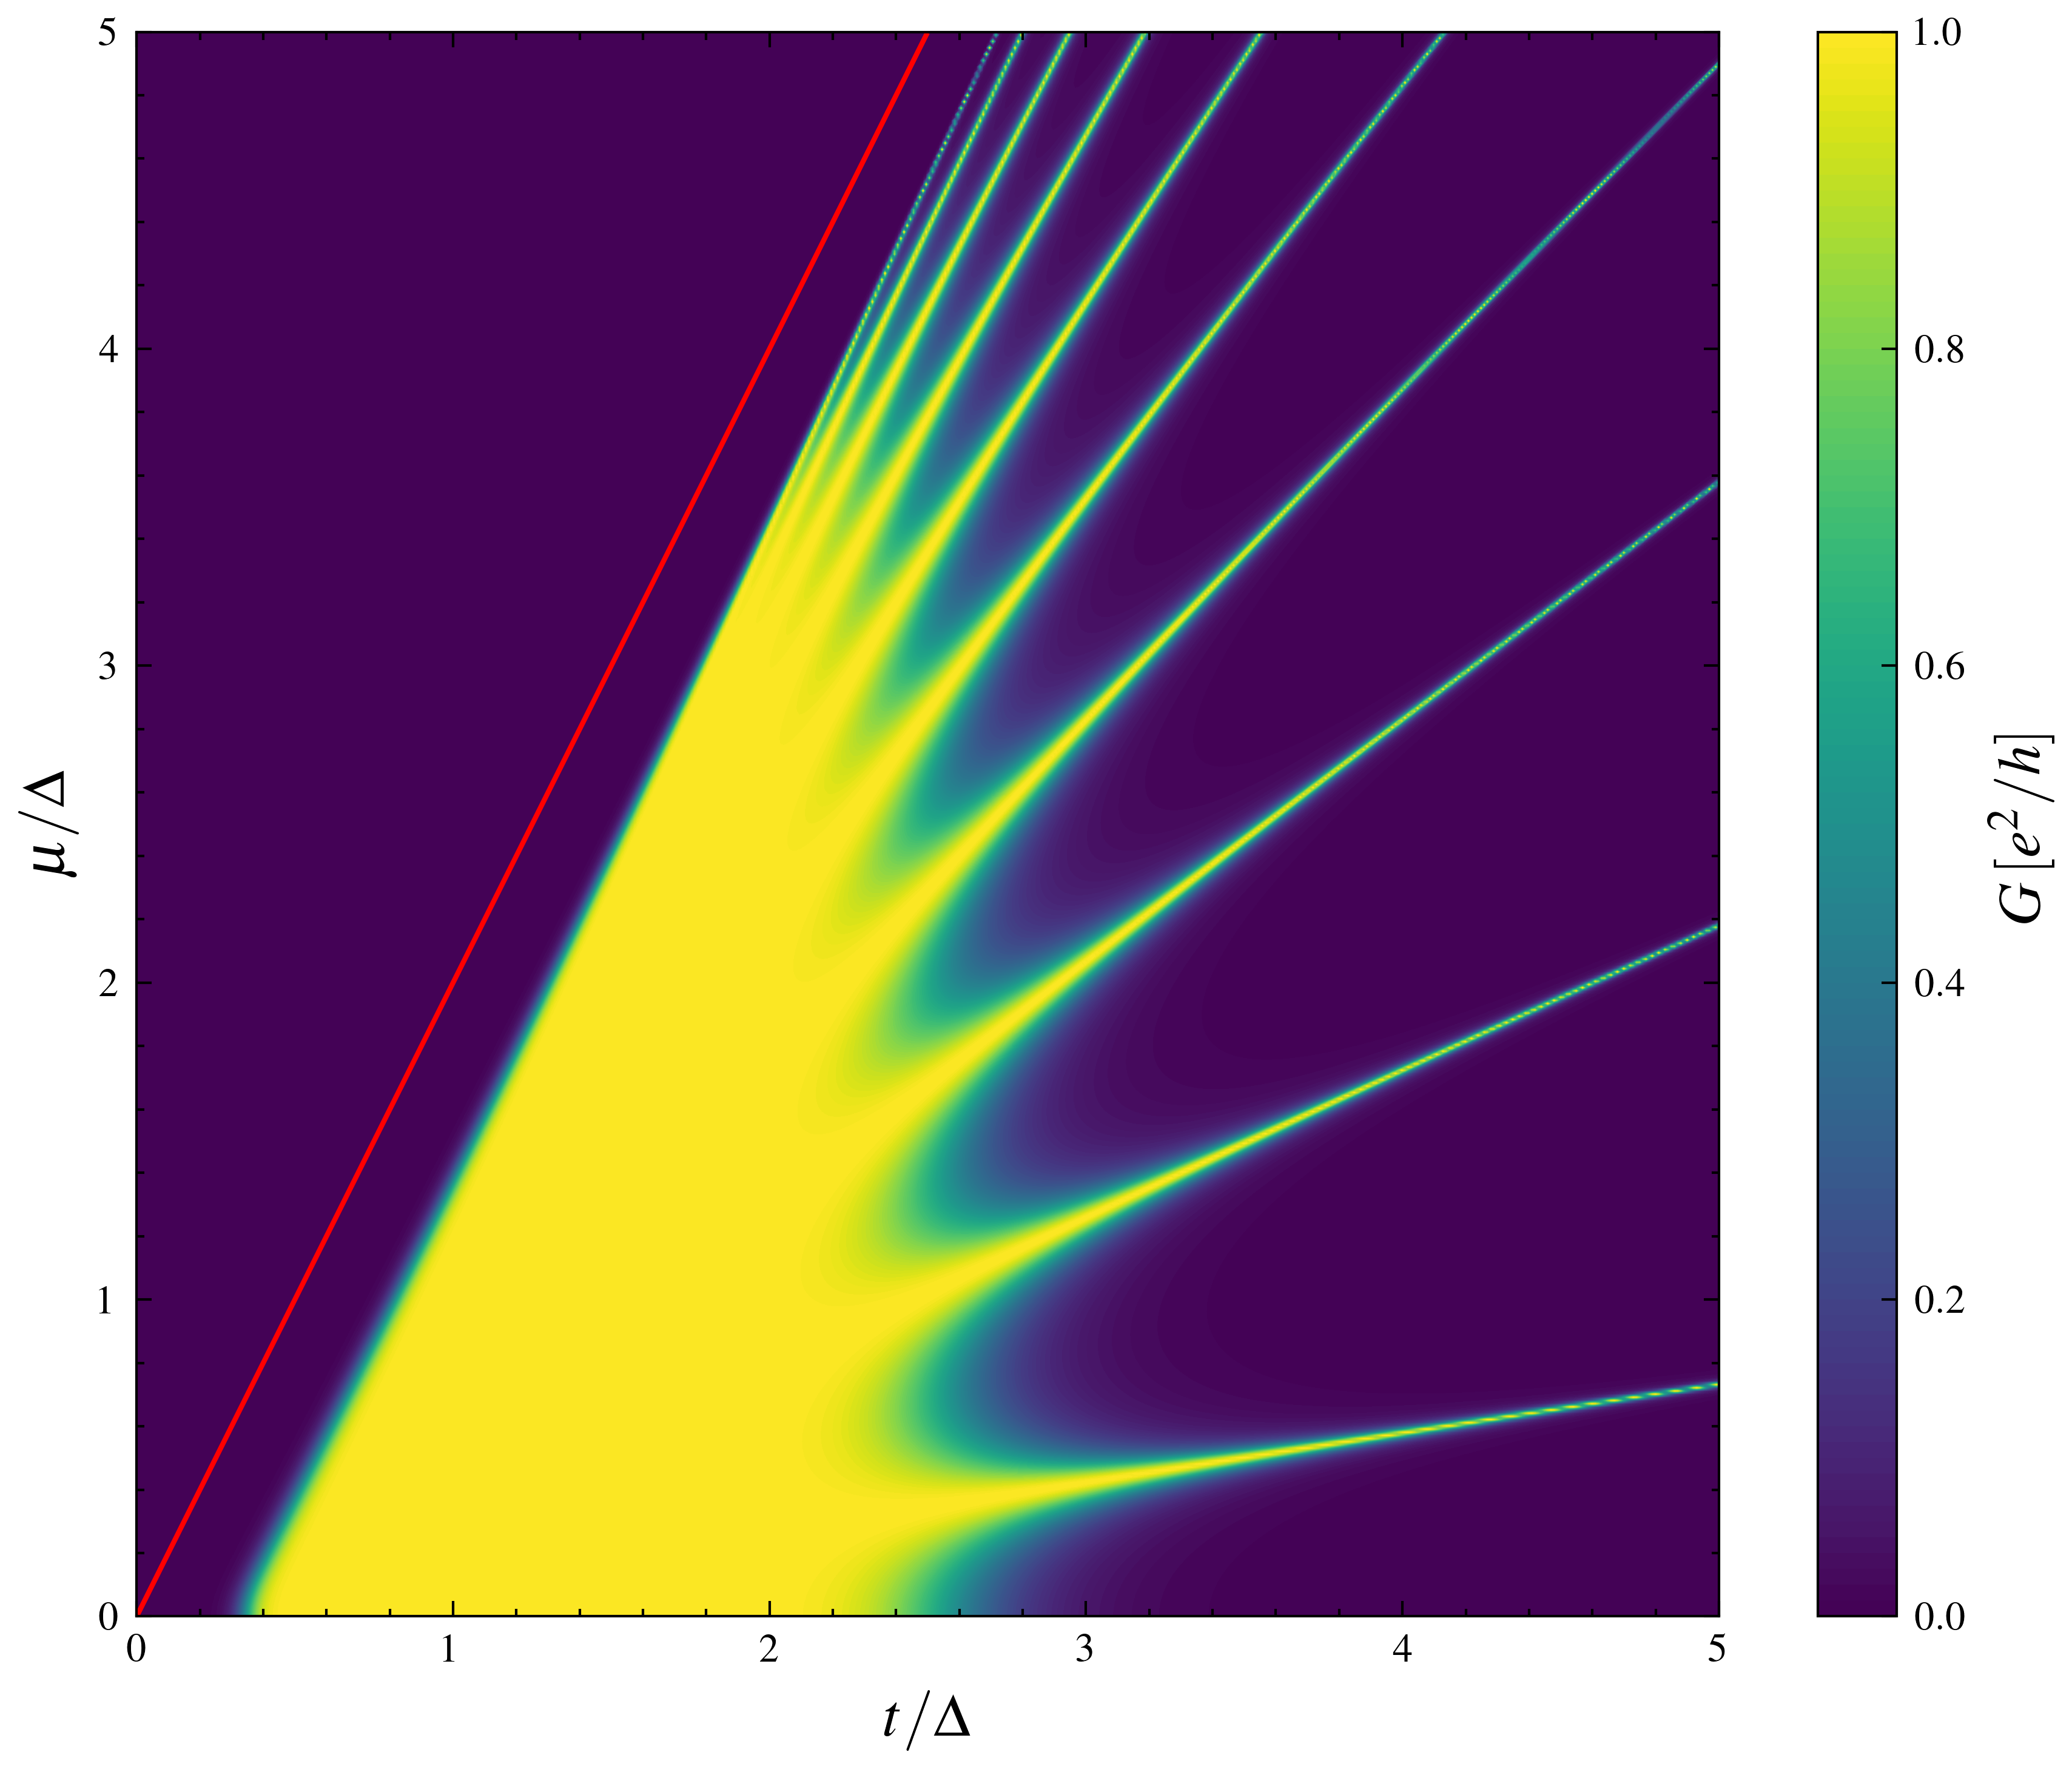

In [81]:
# Total conductance (finite Kitaev chain)

e = 1.0
h = 1.0
Delta = 1.0
gammaL = 0.001*Delta
gammaR = 0.001*Delta
Nsites = 20

def G(e, h, mu, t, Delta, Nsites, gammaL, gammaR):
    
    p = t+Delta
    m = t-Delta

    x0 = xj(mu, m, p, Nsites)
    x1 = xj(mu, m, p, Nsites-1)
    x2 = xj(mu, m, p, Nsites-2)
    
    qplus = polyq(p, gammaL, gammaR, 1, Nsites, x0, x1, x2)
    G_val = (gammaL*gammaR*(p**(Nsites-1)+m**(Nsites-1))**2)/(qplus**2+gammaL*gammaR*(p**(Nsites-1)+m**(Nsites-1))**2)
    return G_val


mu_vals = np.linspace(0,5*Delta,500)   # Y-axis 
t_vals = np.linspace(0,5*Delta,500)    # X-axis  
mu, t = np.meshgrid(mu_vals, t_vals)

t_max = 2.5*Delta
t_vals_trunc = t_vals[t_vals<=t_max]

G_vec = np.vectorize(G)
G_vals = G_vec(e, h, mu, t, Delta, Nsites, gammaL, gammaR)

plt.figure(figsize=(6,5))
contour = plt.contourf(t/Delta, mu/Delta, G_vals, levels=100, cmap='viridis', vmin=0, vmax=1) 

cbar = plt.colorbar(contour, ticks=np.arange(0, 1.1, 0.2))  
cbar.set_label(r'$G \:[e^{2}/h]$',fontsize=12)

plt.xlabel(r'$t/\Delta$',fontsize=12)
plt.ylabel(r'$\mu/\Delta$',fontsize=12)
plt.plot(t_vals_trunc/Delta, 2*t_vals_trunc/Delta, color='red')
plt.tight_layout()
plt.savefig("KC_Gtot_cmap.png")
plt.show()

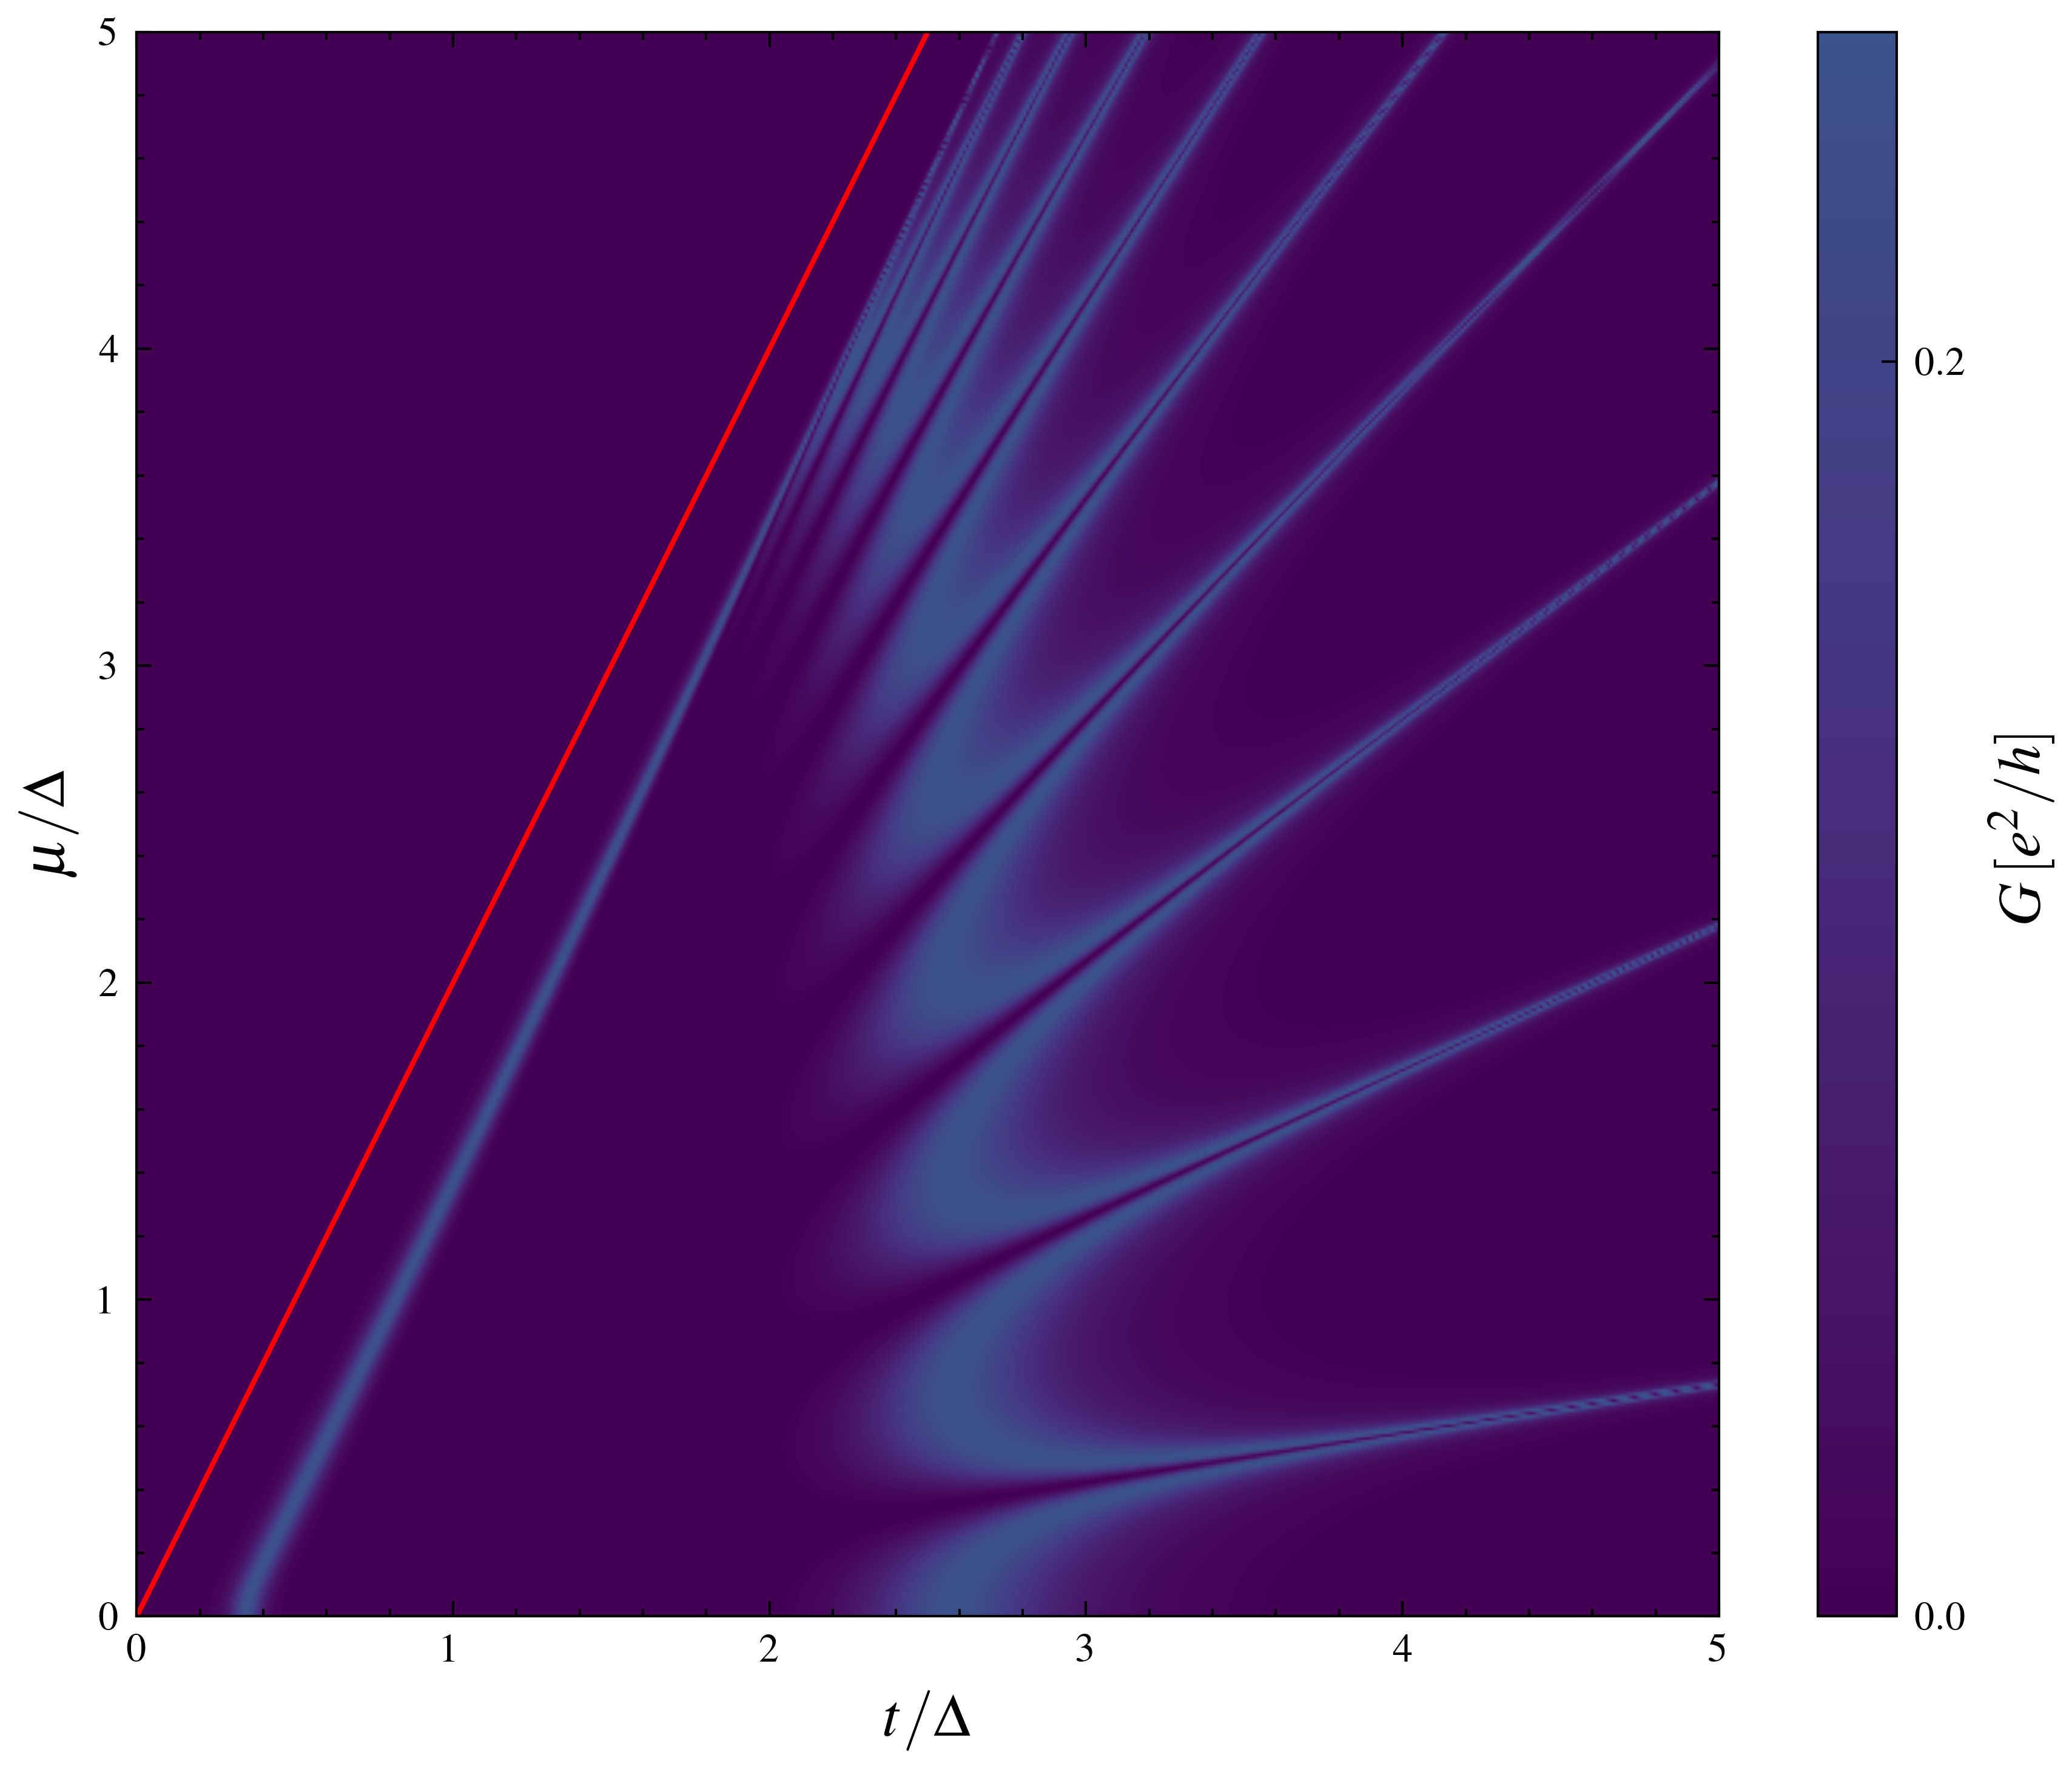

In [82]:
# Direct conductance term (finite Kitaev chain)

e = 1.0
h = 1.0
Delta = 1.0
gammaL = 0.001*Delta
gammaR = 0.001*Delta
Nsites = 20

def GD(e, h, mu, t, Delta, Nsites, gammaL, gammaR):
    
    p = t+Delta
    m = t-Delta

    x0 = xj(mu, m, p, Nsites)
    x1 = xj(mu, m, p, Nsites-1)
    x2 = xj(mu, m, p, Nsites-2)
    
    qplus = polyq(p, gammaL, gammaR, 1, Nsites, x0, x1, x2)
    qminus = polyq(p, gammaL, gammaR, -1, Nsites, x0, x1, x2)
    GD_val = ((gammaL*gammaR*(p**(Nsites-1)+m**(Nsites-1))**2)/(qplus**2+gammaL*gammaR*(p**(Nsites-1)+m**(Nsites-1))**2)**2)*(qminus**2)
    return GD_val


mu_vals = np.linspace(0,5*Delta,500)   # Y-axis 
t_vals = np.linspace(0,5*Delta,500)    # X-axis  
mu, t = np.meshgrid(mu_vals, t_vals)

t_max = 2.5*Delta
t_vals_trunc = t_vals[t_vals<=t_max]

GD_vec = np.vectorize(GD)
GD_vals = GD_vec(e, h, mu, t, Delta, Nsites, gammaL, gammaR)

plt.figure(figsize=(6,5))
contour = plt.contourf(t/Delta, mu/Delta, GD_vals, levels=100, cmap='viridis', vmin=0, vmax=1) 

cbar = plt.colorbar(contour, ticks=np.arange(0, 1.1, 0.2))  
cbar.set_label(r'$G \:[e^{2}/h]$',fontsize=12)

plt.xlabel(r'$t/\Delta$',fontsize=12)
plt.ylabel(r'$\mu/\Delta$',fontsize=12)
plt.plot(t_vals_trunc/Delta, 2*t_vals_trunc/Delta, color='red')
plt.tight_layout()
plt.savefig("KC_GD_cmap.png")
plt.show()

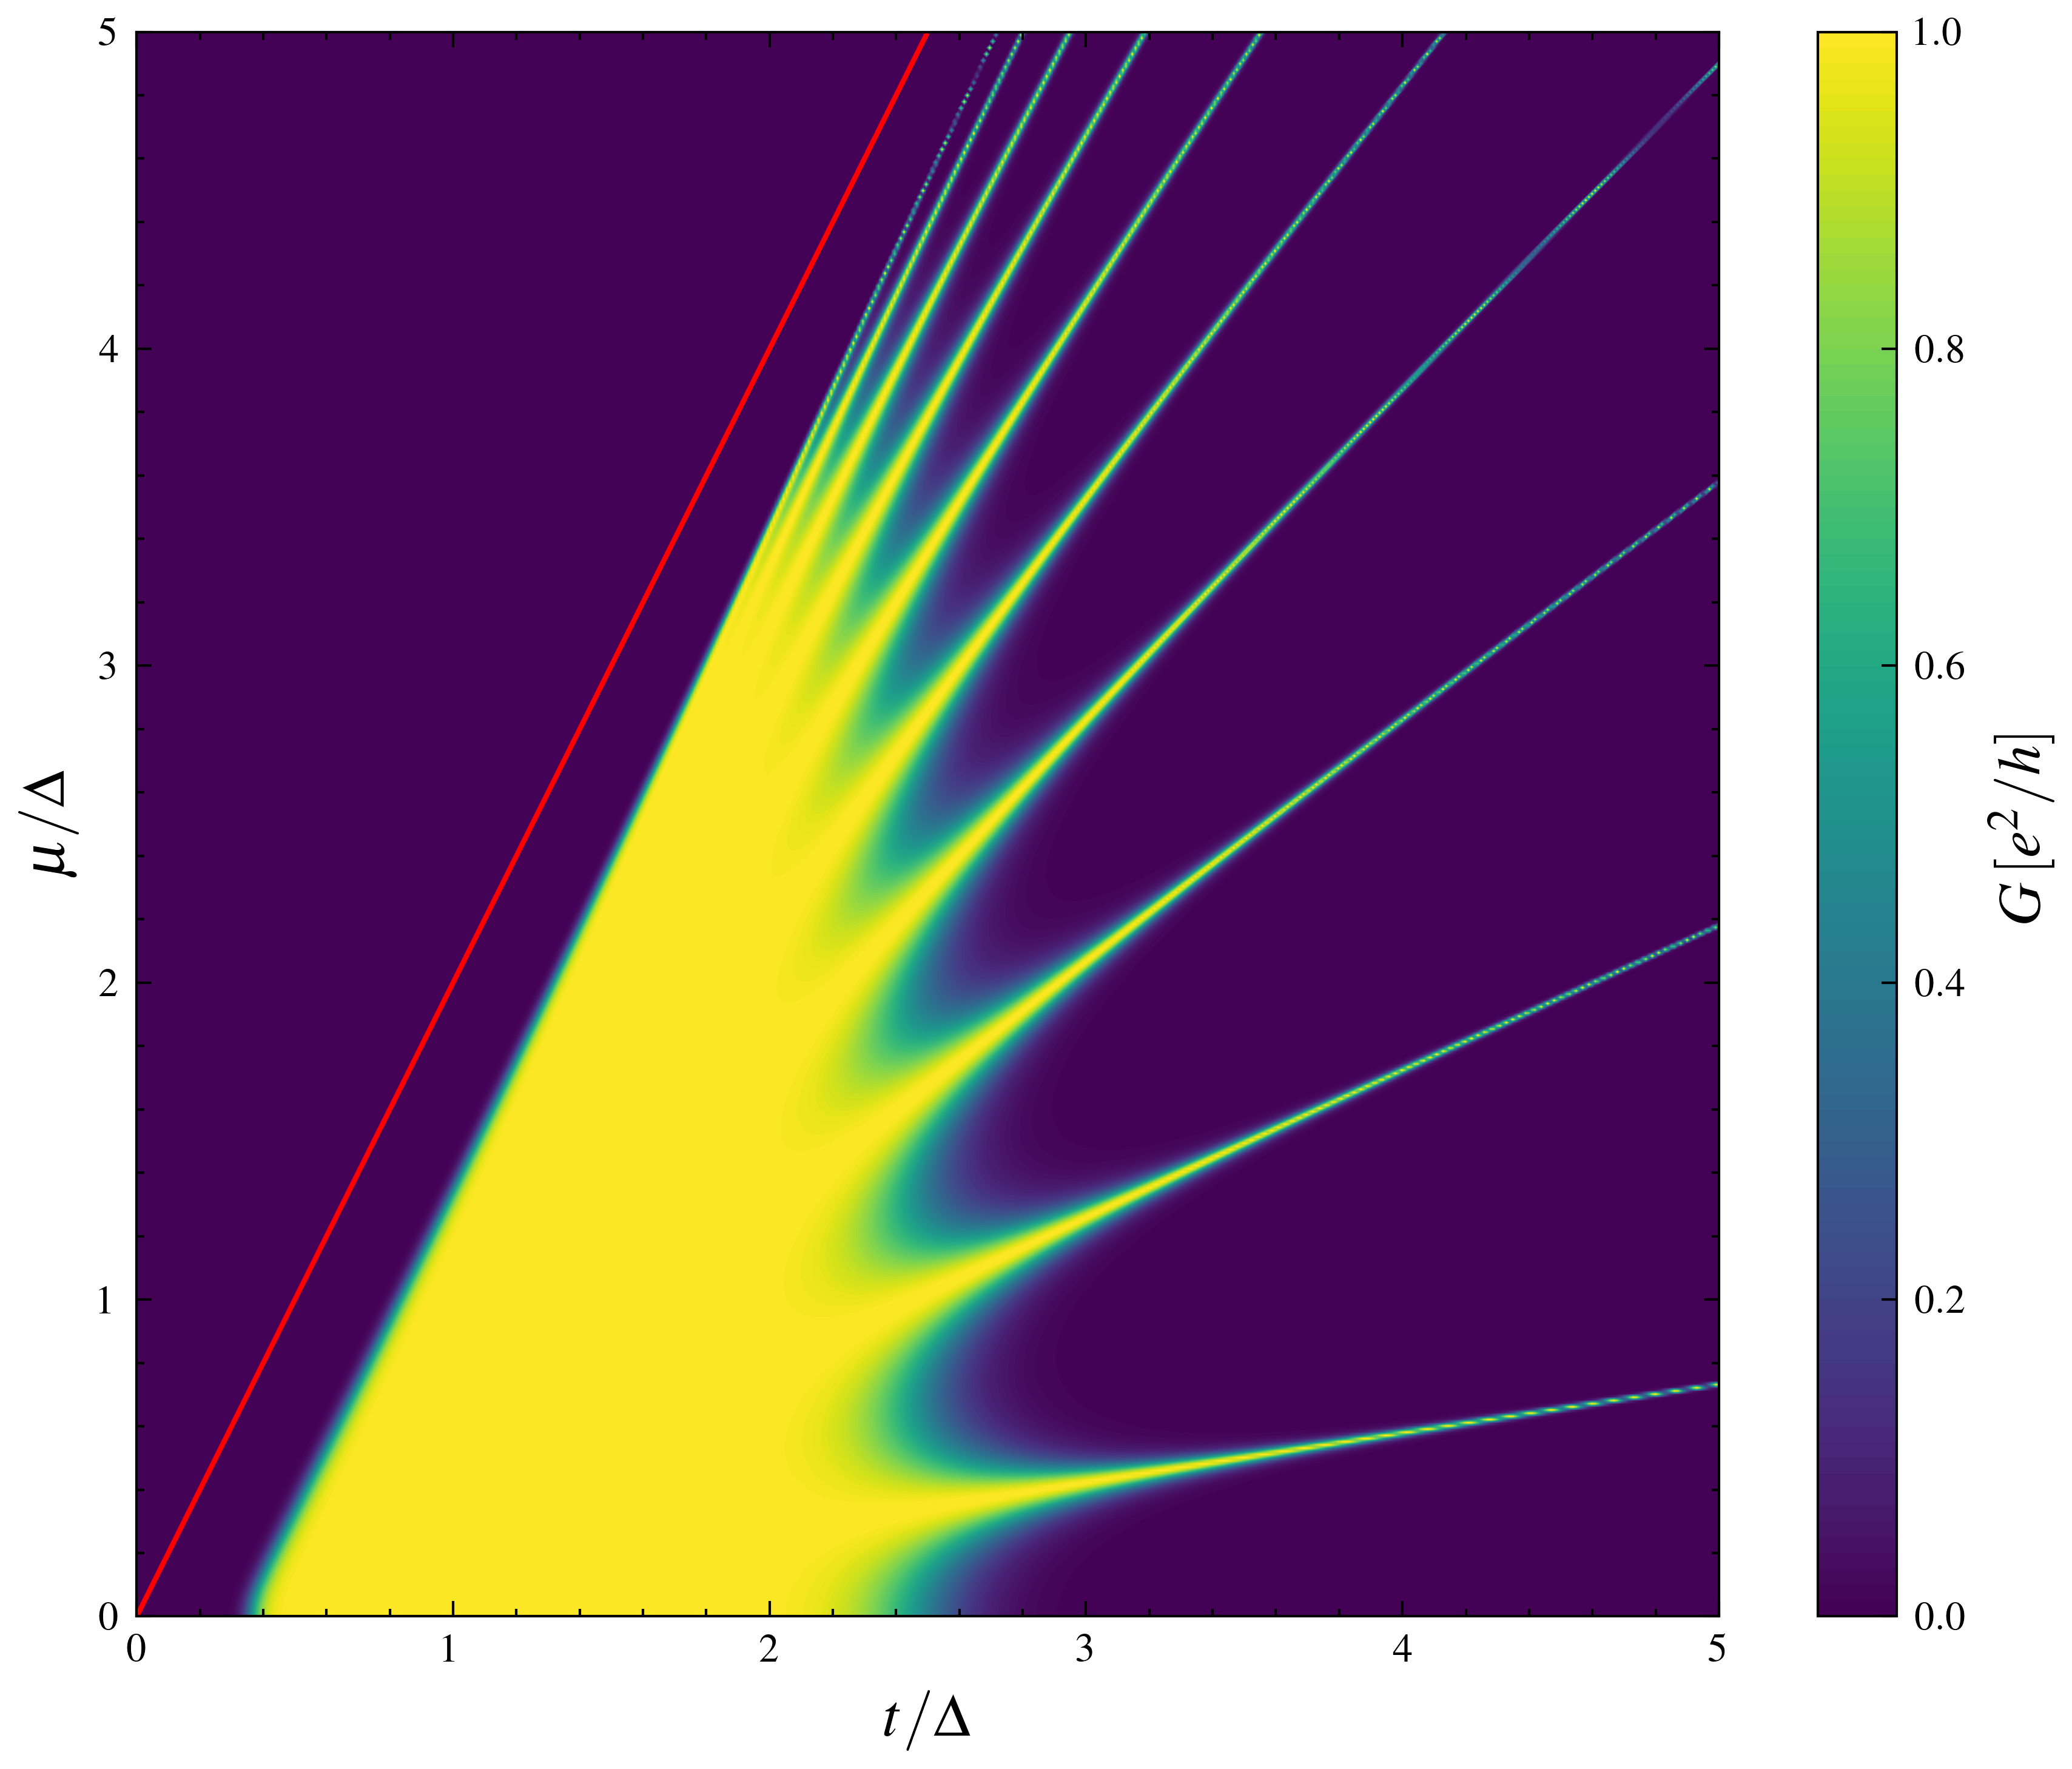

In [83]:
# Andreev conductance term (finite Kitaev chain)

e = 1.0
h = 1.0
Delta = 1.0
gammaL = 0.001*Delta
gammaR = 0.001*Delta
Nsites = 20

mu_vals = np.linspace(0,5*Delta,500)   # Y-axis 
t_vals = np.linspace(0,5*Delta,500)    # X-axis  
mu, t = np.meshgrid(mu_vals, t_vals)

t_max = 2.5*Delta
t_vals_trunc = t_vals[t_vals<=t_max]

GA_vals = G_vals-GD_vals

mask = mu>2*t
GA_vals[mask] = 0

plt.figure(figsize=(6,5))
contour = plt.contourf(t/Delta, mu/Delta, GA_vals, levels=100, cmap='viridis', vmin=0, vmax=1) 

cbar = plt.colorbar(contour, ticks=np.arange(0, 1.1, 0.2))  
cbar.set_label(r'$G \:[e^{2}/h]$',fontsize=12)

plt.xlabel(r'$t/\Delta$',fontsize=12)
plt.ylabel(r'$\mu/\Delta$',fontsize=12)
plt.plot(t_vals_trunc/Delta, 2*t_vals_trunc/Delta, color='red')
plt.tight_layout()
plt.savefig("KC_GA_cmap.png")
plt.show()

In [2]:
# NON-LINEAR TRANSPORT REGIME

In [21]:
# def tetranacci(E, a, b, mu, Nsites, init):
#     tnc = np.zeros(Nsites+3, dtype=complex)
#     tnc[:4] = init

#     for n in range(2, Nsites+1):
#         tnc[n+2] = ((E**2+a**2+b**2-mu**2)/(a*b))*tnc[n] - tnc[n-2] + (1j*mu*((b-a)/(a*b)))*(tnc[n-1]-tnc[n+1])
        
#     return tnc[-4:]

In [20]:
# def djx(sigmaRp, sigmaRm, b, i0, i1, i2):
#     dj = sigmaRp*i0 - 1j*sigmaRm*i1 + b*i2
#     return dj

In [22]:
# def djy(sigmaRp, sigmaRm, a, i0, i1, i2):
#     dj = sigmaRp*i0 + 1j*sigmaRm*i1 + a*i2
#     return dj

In [23]:
# def det(sigmaLm, sigmaLp, sigmaRm, sigmaRp, a, b, x, y, chi, yeta, Nsites):
    
#     d_y_N = djy(sigmaRp, sigmaRm, a, x[2], y[2], y[3])
#     d_chi_N = djx(sigmaRp, sigmaRm, b, yeta[2], chi[2], chi[3])
#     d_x_N = djx(sigmaRp, sigmaRm, b, y[2], x[2], x[3])
#     d_yeta_N = djy(sigmaRp, sigmaRm, a, chi[2], yeta[2], yeta[3])
#     d_y_N_1 = djy(sigmaRp, sigmaRm, a, x[1], y[1], y[2])
#     d_chi_N_1 = djx(sigmaRp, sigmaRm, b, yeta[1], chi[1], chi[2])
#     d_x_N_1 = djx(sigmaRp, sigmaRm, b, y[1], x[1], x[2])
#     d_yeta_N_1 = djy(sigmaRp, sigmaRm, a, chi[1], yeta[1], yeta[2])

#     det = (d_y_N*d_chi_N - d_x_N*d_yeta_N) + ((sigmaLm**2-sigmaLp**2)/(a*b))*(d_y_N_1*d_chi_N_1 - d_x_N_1*d_yeta_N_1) + (sigmaLp/b)*(d_y_N*d_x_N_1 - d_x_N*d_y_N_1) + (sigmaLp/a)*(d_chi_N*d_yeta_N_1 - d_yeta_N*d_chi_N_1) + (1j*sigmaLm/a)*(d_y_N*d_chi_N_1 - d_x_N*d_yeta_N_1) + (1j*sigmaLm/b)*(d_yeta_N*d_x_N_1 - d_chi_N*d_y_N_1)

#     return det

In [24]:
# # G(1,N) term

# def G0(detM, a, b, x, y, chi, yeta, E, omegaL, mu):

#     d_y_N_1 = djy(sigmaRp, sigmaRm, a, x[1], y[1], y[2])
#     d_chi_N_1 = djx(sigmaRp, sigmaRm, b, yeta[1], chi[1], chi[2])
#     d_x_N_1 = djx(sigmaRp, sigmaRm, b, y[1], x[1], x[2])
#     d_yeta_N_1 = djy(sigmaRp, sigmaRm, a, chi[1], yeta[1], yeta[2])
#     d_y_N_2 = djy(sigmaRp, sigmaRm, a, x[0], y[0], y[1])
#     d_chi_N_2 = djx(sigmaRp, sigmaRm, b, yeta[0], chi[0], chi[1])
#     d_x_N_2 = djx(sigmaRp, sigmaRm, b, y[0], x[0], x[1])
#     d_yeta_N_2 = djy(sigmaRp, sigmaRm, a, chi[0], yeta[0], yeta[1])

#     G0 = (b/a)*(d_chi_N_2 + 1j*d_yeta_N_2) + (a/b)*(d_y_N_2 - 1j*d_x_N_2) + (E-omegaL-mu)*((d_x_N_1 + 1j*d_y_N_1)/b + (d_yeta_N_1 - 1j*d_chi_N_1)/a)
#     G0 = G0/(2*detM)

#     return np.abs(G0)

In [25]:
# # G(1,N+1) term

# def G1(detM, a, b, x, y, chi, yeta):

#     d_y_N_1 = djy(sigmaRp, sigmaRm, a, x[1], y[1], y[2])
#     d_chi_N_1 = djx(sigmaRp, sigmaRm, b, yeta[1], chi[1], chi[2])
#     d_x_N_1 = djx(sigmaRp, sigmaRm, b, y[1], x[1], x[2])
#     d_yeta_N_1 = djy(sigmaRp, sigmaRm, a, chi[1], yeta[1], yeta[2])
#     d_y_N_2 = djy(sigmaRp, sigmaRm, a, x[0], y[0], y[1])
#     d_chi_N_2 = djx(sigmaRp, sigmaRm, b, yeta[0], chi[0], chi[1])
#     d_x_N_2 = djx(sigmaRp, sigmaRm, b, y[0], x[0], x[1])
#     d_yeta_N_2 = djy(sigmaRp, sigmaRm, a, chi[0], yeta[0], yeta[1])

#     G1 = (b**2/a)*(d_yeta_N_2*d_chi_N_1 - d_yeta_N_1*d_chi_N_2) + (a**2/b)*(d_y_N_2*d_x_N_1 - d_y_N_1*d_x_N_2) + (1j*a)*(d_chi_N_1*d_y_N_2 - d_yeta_N_1*d_x_N_2) - (1j*b)*(d_x_N_1*d_yeta_N_2 - d_y_N_1*d_chi_N_2)
#     G1 = G1/((-2*a*b)*detM)

#     return np.abs(G1)

In [26]:
# # Total conductance (finite Kitaev chain)

# e = 1.0
# h = 1.0
# Delta = 1.0
# t = 4.1*Delta
# gammaL = 0.02*Delta
# gammaR = 0.02*Delta
# Nsites = 20

# a = 1j*(Delta-t)
# b = 1j*(Delta+t)

# # Wide-band limit
# sigmaLp = -1j*gammaL   
# sigmaRp = -1j*gammaR
# sigmaLm = 0
# sigmaRm = 0

# # V_vals = np.linspace(-20*Delta/e, 20*Delta/e, 200)
# # mu_vals = np.linspace(-10*Delta, 10*Delta, 200)
# V_vals = np.linspace(-20*Delta/e, 20*Delta/e, 400)
# mu_vals = np.linspace(-10*Delta, 10*Delta, 400)
# mu, V = np.meshgrid(mu_vals, V_vals)

# Gr0_vals = np.zeros(mu.shape, dtype=complex)
# Gr1_vals = np.zeros(mu.shape, dtype=complex)

# for i in range(mu.shape[0]):             # loop over V
#     for j in range(mu.shape[1]):         # loop over mu
        
#         V_val = V[i,j]
#         mu_val = mu[i,j]

#         E_vals = [-V_val/2, V_val/2]

#         Gr0 = 0
#         Gr1 = 0

#         for E_val in E_vals:
            
#            # Tetranacci polynomials init values
#             x_init = np.array([b/a, 0, 1, -1j*mu_val/b], dtype=complex)
#             yeta_init = np.array([a/b, 0, 1, 1j*mu_val/a], dtype=complex)
#             chi_init = np.array([0, 0, 0, E_val/b], dtype=complex)
#             y_init = np.array([0, 0, 0, E_val/a], dtype=complex) 

#            # Tetranacci recursion relation, returns (N-3), (N-2), (N-1) and Nth elements
#             x = tetranacci(E_val, a, b, mu_val, Nsites, x_init)
#             yeta = tetranacci(E_val, a, b, mu_val, Nsites, yeta_init)
#             chi = tetranacci(E_val, a, b, mu_val, Nsites, chi_init)
#             y =  tetranacci(E_val, a, b, mu_val, Nsites, y_init)

#            # Defining the matrix determinant term
#             detM = det(sigmaLm, sigmaLp, sigmaRm, sigmaRp, a, b, x, y, chi, yeta, Nsites)

#            # Defining the G(1,N), G(1,N+1) term 
#             Gr0 += (G0(detM, a, b, x, y, chi, yeta, E_val, -1j*gammaL, mu_val))**2
#             Gr1 += (G1(detM, a, b, x, y, chi, yeta))**2

#         Gr0_vals[i,j] = Gr0
#         Gr1_vals[i,j] = Gr1

# G_vals = 0.5*gammaL*(gammaR*Gr0_vals + gammaL*Gr1_vals) + 1e-8

# plt.figure(figsize=(12,10))
# contour = plt.contourf(mu/Delta, e*V/(2*Delta), np.abs(G_vals), levels=100, cmap='Blues', norm=LogNorm(vmin=1e-8,vmax=1))
# cbar = plt.colorbar(label=r'$\partial I / \partial V \: [e^2/h]$')

# plt.xlabel(r'$\mu / \Delta$',fontsize=12)
# plt.ylabel(r'$eV / (2\Delta)$',fontsize=12)
# plt.tight_layout()
# plt.show()

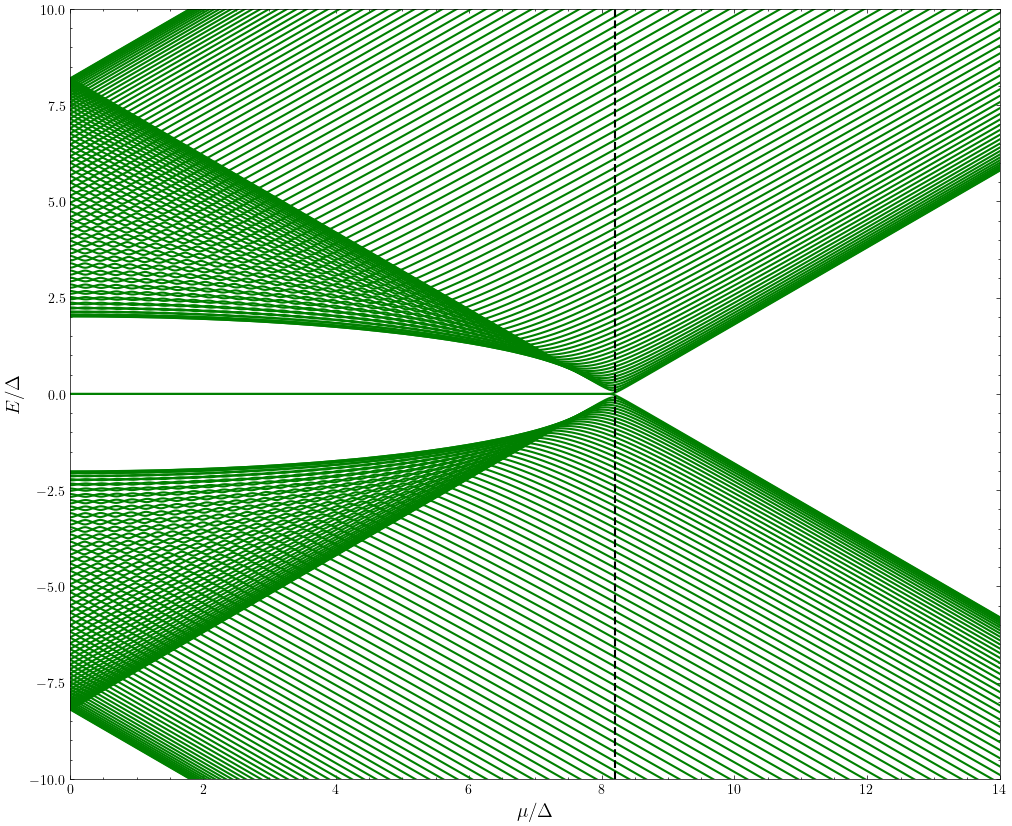

In [8]:
# Energy spectrum of a finite Kitaev chain (pristine setup, N=100, t/\Delta=4.1)

plt.figure(figsize=(12,10))

mu = 0.0
Delta = 2.0
t = 4.1*Delta
Nsites = 100

mu_vals = np.linspace(0,14*Delta,500)
E_vals = np.zeros([len(mu_vals),2*Nsites])

for i in range(len(mu_vals)):
    E_vals[i] = la.eigh(kitaev(Nsites, mu_vals[i], t, Delta))[0]

for i in range(2*Nsites):
    plt.plot(mu_vals/Delta,E_vals[:,i]/Delta,color='green',linewidth=1.5)

plt.ylabel('$E/\Delta$',fontsize=14)
plt.xlabel('$\mu/\Delta$',fontsize=14)
plt.axvline(x=2*t/Delta, color='black', linestyle='--', linewidth=1.5)
plt.xlim(0,14)
plt.ylim(-10,10)
# plt.savefig("KC.png")
plt.show()

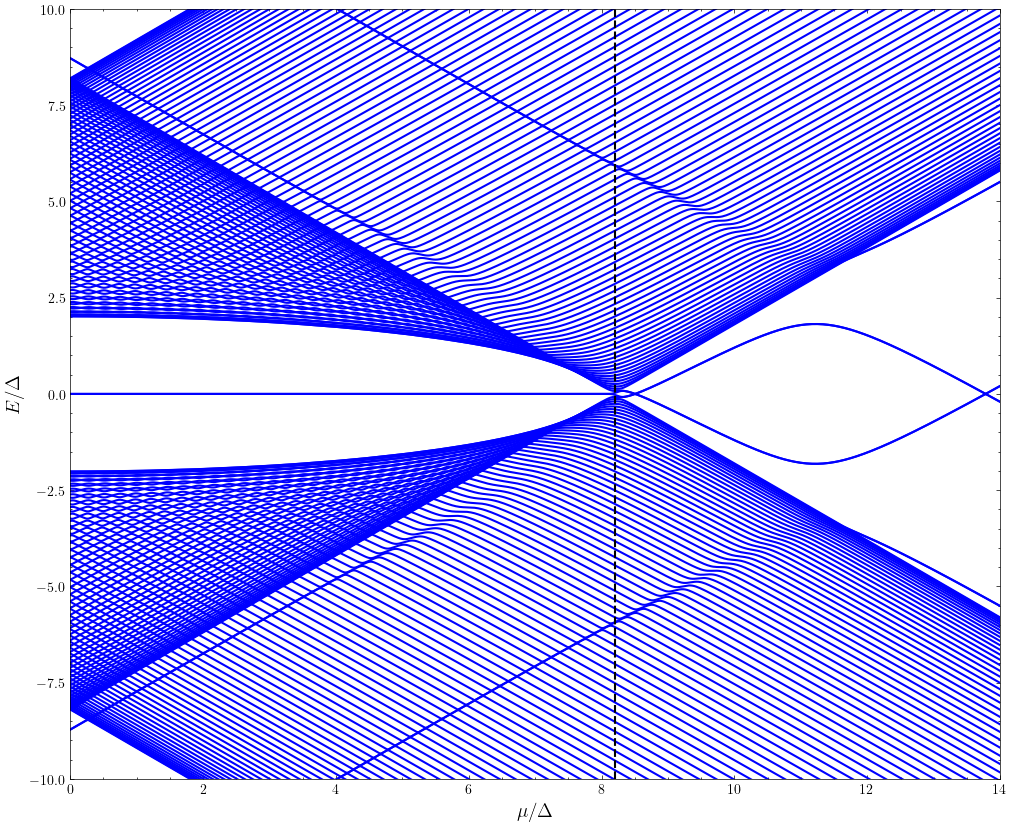

In [9]:
# Energy spectrum of a finite Kitaev chain (disordered setup, N=100, t/\Delta=4.1)

plt.figure(figsize=(12,10))

mu = 0.0
Delta = 2.0
t = 4.1*Delta
barrier = 10*Delta
sigma = 2
Nsites = 100

mu_vals = np.linspace(0,14*Delta,500)
E_vals = np.zeros([len(mu_vals),2*Nsites])

for i in range(len(mu_vals)):
    E_vals[i] = la.eigh(kitaev_disorder(Nsites, mu_vals[i], t, Delta, barrier, sigma))[0]

for i in range(2*Nsites):
    plt.plot(mu_vals/Delta,E_vals[:,i]/Delta,color='blue',linewidth=1.5)

plt.ylabel('$E/\Delta$',fontsize=14)
plt.xlabel('$\mu/\Delta$',fontsize=14)
plt.axvline(x=2*t/Delta, color='black', linestyle='--', linewidth=1.5)
plt.xlim(0,14)
plt.ylim(-10,10)
# plt.savefig("KC.png")
plt.show()

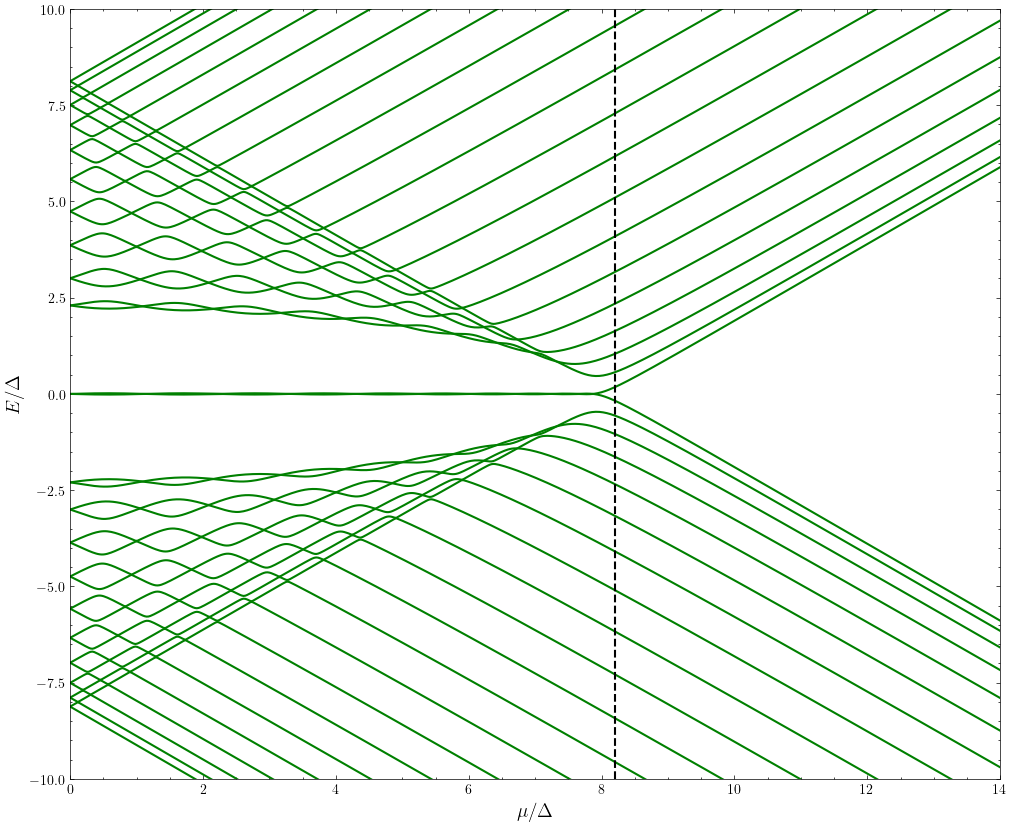

In [10]:
# Energy spectrum of a finite Kitaev chain (pristine setup, N=21, t/\Delta=4.1)

plt.figure(figsize=(12,10))

mu = 0.0
Delta = 2.0
t = 4.1*Delta
Nsites = 21

mu_vals = np.linspace(0,14*Delta,500)
E_vals = np.zeros([len(mu_vals),2*Nsites])

for i in range(len(mu_vals)):
    E_vals[i] = la.eigh(kitaev(Nsites, mu_vals[i], t, Delta))[0]

for i in range(2*Nsites):
    plt.plot(mu_vals/Delta,E_vals[:,i]/Delta,color='green',linewidth=1.5)

plt.ylabel('$E/\Delta$',fontsize=14)
plt.xlabel('$\mu/\Delta$',fontsize=14)
plt.axvline(x=2*t/Delta, color='black', linestyle='--', linewidth=1.5)
plt.xlim(0,14)
plt.ylim(-10,10)
# plt.savefig("KC.png")
plt.show()

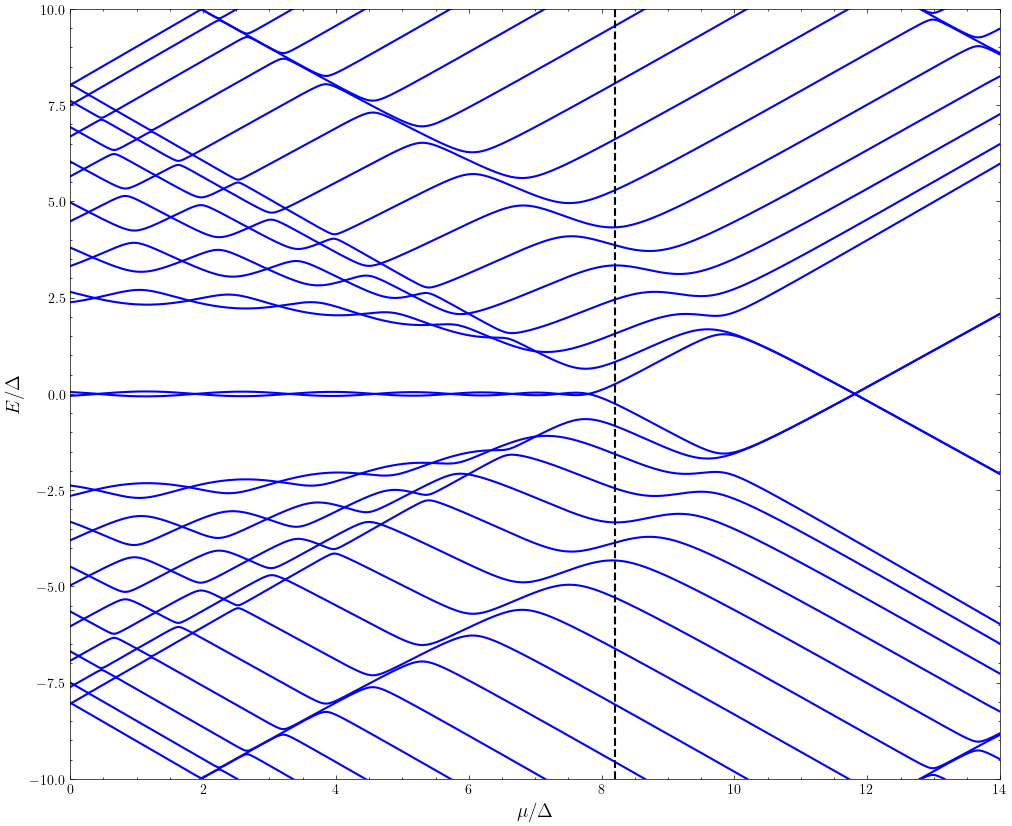

In [11]:
# Energy spectrum of a finite Kitaev chain (disordered setup, N=21, t/\Delta=4.1)

plt.figure(figsize=(12,10))

mu = 0.0
Delta = 2.0
t = 4.1*Delta
barrier = 30*Delta
sigma = 2
Nsites = 21

E_vals = np.zeros([len(mu_vals),2*Nsites])

for i in range(len(mu_vals)):
    E_vals[i] = la.eigh(kitaev_disorder(Nsites, mu_vals[i], t, Delta, barrier, sigma))[0]

for i in range(2*Nsites):
    plt.plot(mu_vals/Delta,E_vals[:,i]/Delta,color='blue',linewidth=1.5)

plt.ylabel('$E/\Delta$',fontsize=14)
plt.xlabel('$\mu/\Delta$',fontsize=14)
plt.axvline(x=2*t/Delta, color='black', linestyle='--', linewidth=1.5)
plt.xlim(0,14)
plt.ylim(-10,10)
# plt.savefig("KC.png")
plt.show()

In [5]:
def GF(E, H_BdG, SigmaL, SigmaR, eta):
    GF = np.linalg.inv((E+1j*eta)*np.eye(H_BdG.shape[0])-H_BdG-SigmaL-SigmaR)
    return GF

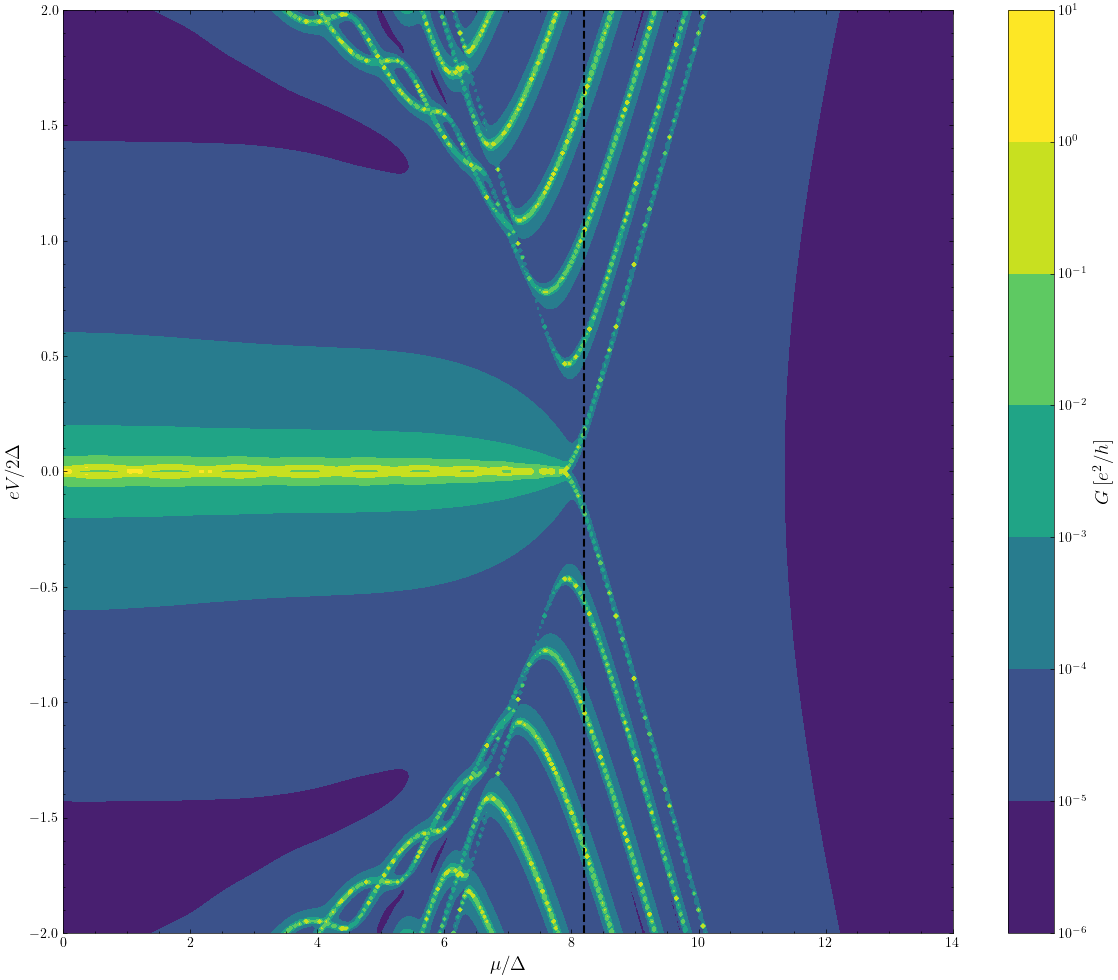

In [6]:
# Non-linear transport regime in N-S-N junctions (pristine setup)

plt.figure(figsize=(12,10))

e = 1.0
h = 1.0
eta = 1e-8
mu = 0.0
Delta = 1.0
t = 4.1*Delta
gammaL = 0.02*Delta
gammaR = 0.02*Delta
Nsites = 21

mu_vals = np.linspace(0*Delta,14*Delta,400)
E_vals = np.linspace(-2*Delta,2*Delta,400)
mu, E = np.meshgrid(mu_vals, E_vals)

# defining self-energy matrices 

SigmaL = np.zeros([2*Nsites,2*Nsites],dtype=complex)
SigmaR = np.zeros([2*Nsites,2*Nsites],dtype=complex)

SigmaL[0,0] = -1j*gammaL/2
SigmaL[1,1] = -1j*gammaL/2
SigmaR[2*Nsites-2,2*Nsites-2] = -1j*gammaR/2
SigmaR[2*Nsites-1,2*Nsites-1] = -1j*gammaR/2

# defining broadening matrices

GammaL = np.zeros([2*Nsites,2*Nsites],dtype=complex)
GammaR = np.zeros([2*Nsites,2*Nsites],dtype=complex)

GammaL = 1j*(SigmaL-np.conjugate(SigmaL).T)
GammaR = 1j*(SigmaR-np.conjugate(SigmaR).T)

# defining the BdG Hamiltonian

H_vals = np.zeros([len(mu_vals),2*Nsites,2*Nsites],dtype=complex)

for n in range(0,len(mu_vals)):
    H_vals[n] = kitaev(Nsites, mu_vals[n], t, Delta)

# defining the Green's functions

Gr_vals = np.zeros((len(E_vals), len(H_vals), 2*Nsites, 2*Nsites), dtype=complex)
Ga_vals = np.zeros((len(E_vals), len(H_vals), 2*Nsites, 2*Nsites), dtype=complex)

for i, E in enumerate(E_vals):
    for j, H in enumerate(H_vals):
        Gr_vals[i,j] = GF(E, H, SigmaL, SigmaR, eta)

Ga_vals = np.conjugate(Gr_vals).transpose(0,1,3,2)

# defining transmission coefficients

TD_vals = np.zeros([len(E_vals),len(mu_vals)])
TA_vals = np.zeros([len(E_vals),len(mu_vals)])

for i in range(0,len(E_vals)):
    for j in range(0,len(mu_vals)):
        TD_vals[i,j] = np.abs(np.trace(GammaL*Gr_vals[i,j]*GammaR*Ga_vals[i,j]))
        TA_vals[i,j] = np.abs(np.trace(GammaL*Gr_vals[i,j]*GammaL*Ga_vals[i,j]))

# defining conductance (in terms of e^2/h)

G_vals = np.zeros([len(E_vals),len(mu_vals)])

for i in range(len(E_vals)//2,len(E_vals)):
    for j in range(len(mu_vals)):
        neg_idx = len(E_vals)-i-1

        G_pos_val = 0.5*(TD_vals[i,j]+TA_vals[i,j])
        G_neg_val =  0.5*(TD_vals[neg_idx,j]+TA_vals[neg_idx,j])
        
        G_vals[i,j] = G_pos_val+G_neg_val
        G_vals[neg_idx,j] = G_vals[i,j]

contour = plt.contourf(mu_vals/Delta, E_vals/Delta, G_vals, levels=100, norm=LogNorm(vmin=1e-6,vmax=1), cmap='viridis')#, extend='both')

cbar = plt.colorbar(contour)
cbar.set_label(r'$G\:[e^{2}/h]$', fontsize=14)

plt.xlabel(r'$\mu/\Delta$', fontsize=14)
plt.ylabel(r'$eV/2\Delta$', fontsize=14)
plt.axvline(x=2*t/Delta, color='black', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

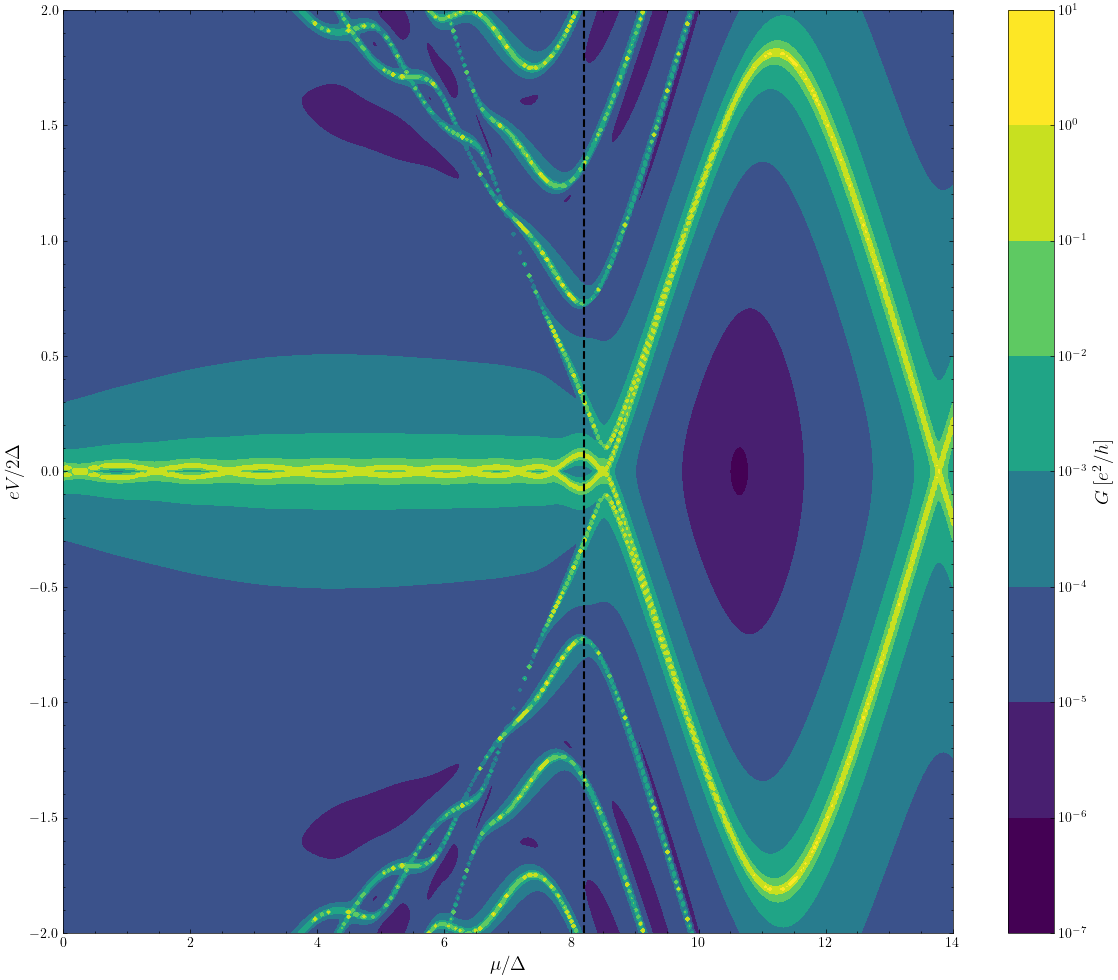

In [7]:
# Non-linear transport regime in N-S-N junctions (disordered setup)

plt.figure(figsize=(12,10))

e = 1.0
h = 1.0
eta = 1e-8
mu = 0.0
Delta = 1.0
t = 4.1*Delta
gammaL = 0.02*Delta
gammaR = 0.02*Delta
barrier = 10*Delta
sigma = 2
Nsites = 21

mu_vals = np.linspace(0*Delta,14*Delta,400)
E_vals = np.linspace(-2*Delta,2*Delta,400)
mu, E = np.meshgrid(mu_vals, E_vals)

# defining self-energy matrices 

SigmaL = np.zeros([2*Nsites,2*Nsites],dtype=complex)
SigmaR = np.zeros([2*Nsites,2*Nsites],dtype=complex)

SigmaL[0,0] = -1j*gammaL/2
SigmaL[1,1] = -1j*gammaL/2
SigmaR[2*Nsites-2,2*Nsites-2] = -1j*gammaR/2
SigmaR[2*Nsites-1,2*Nsites-1] = -1j*gammaR/2

# defining broadening matrices

GammaL = np.zeros([2*Nsites,2*Nsites],dtype=complex)
GammaR = np.zeros([2*Nsites,2*Nsites],dtype=complex)

GammaL = 1j*(SigmaL-np.conjugate(SigmaL).T)
GammaR = 1j*(SigmaR-np.conjugate(SigmaR).T)

# defining the BdG Hamiltonian

H_vals = np.zeros([len(mu_vals),2*Nsites,2*Nsites],dtype=complex)

for n in range(0,len(mu_vals)):
    H_vals[n] = kitaev_disorder(Nsites, mu_vals[n], t, Delta, barrier, sigma)

# defining the Green's functions

Gr_vals = np.zeros((len(E_vals), len(H_vals), 2*Nsites, 2*Nsites), dtype=complex)
Ga_vals = np.zeros((len(E_vals), len(H_vals), 2*Nsites, 2*Nsites), dtype=complex)

for i, E in enumerate(E_vals):
    for j, H in enumerate(H_vals):
        Gr_vals[i,j] = GF(E, H, SigmaL, SigmaR, eta)

Ga_vals = np.conjugate(Gr_vals).transpose(0,1,3,2)

# defining transmission coefficients

TD_vals = np.zeros([len(E_vals),len(mu_vals)])
TA_vals = np.zeros([len(E_vals),len(mu_vals)])

for i in range(0,len(E_vals)):
    for j in range(0,len(mu_vals)):
        TD_vals[i,j] = np.abs(np.trace(GammaL*Gr_vals[i,j]*GammaR*Ga_vals[i,j]))
        TA_vals[i,j] = np.abs(np.trace(GammaL*Gr_vals[i,j]*GammaL*Ga_vals[i,j]))

# defining conductance (in terms of e^2/h)

G_vals = np.zeros([len(E_vals),len(mu_vals)])

for i in range(len(E_vals)//2,len(E_vals)):
    for j in range(len(mu_vals)):
        neg_idx = len(E_vals)-i-1

        G_pos_val = 0.5*(TD_vals[i,j]+TA_vals[i,j])
        G_neg_val =  0.5*(TD_vals[neg_idx,j]+TA_vals[neg_idx,j])
        
        G_vals[i,j] = G_pos_val+G_neg_val
        G_vals[neg_idx,j] = G_vals[i,j]

contour = plt.contourf(mu_vals/Delta, E_vals/Delta, G_vals, levels=100, norm=LogNorm(vmin=1e-6,vmax=1), cmap='viridis')#, extend='both')

cbar = plt.colorbar(contour)
cbar.set_label(r'$G\:[e^{2}/h]$', fontsize=14)

plt.xlabel(r'$\mu/\Delta$', fontsize=14)
plt.ylabel(r'$eV/2\Delta$', fontsize=14)
plt.axvline(x=2*t/Delta, color='black', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

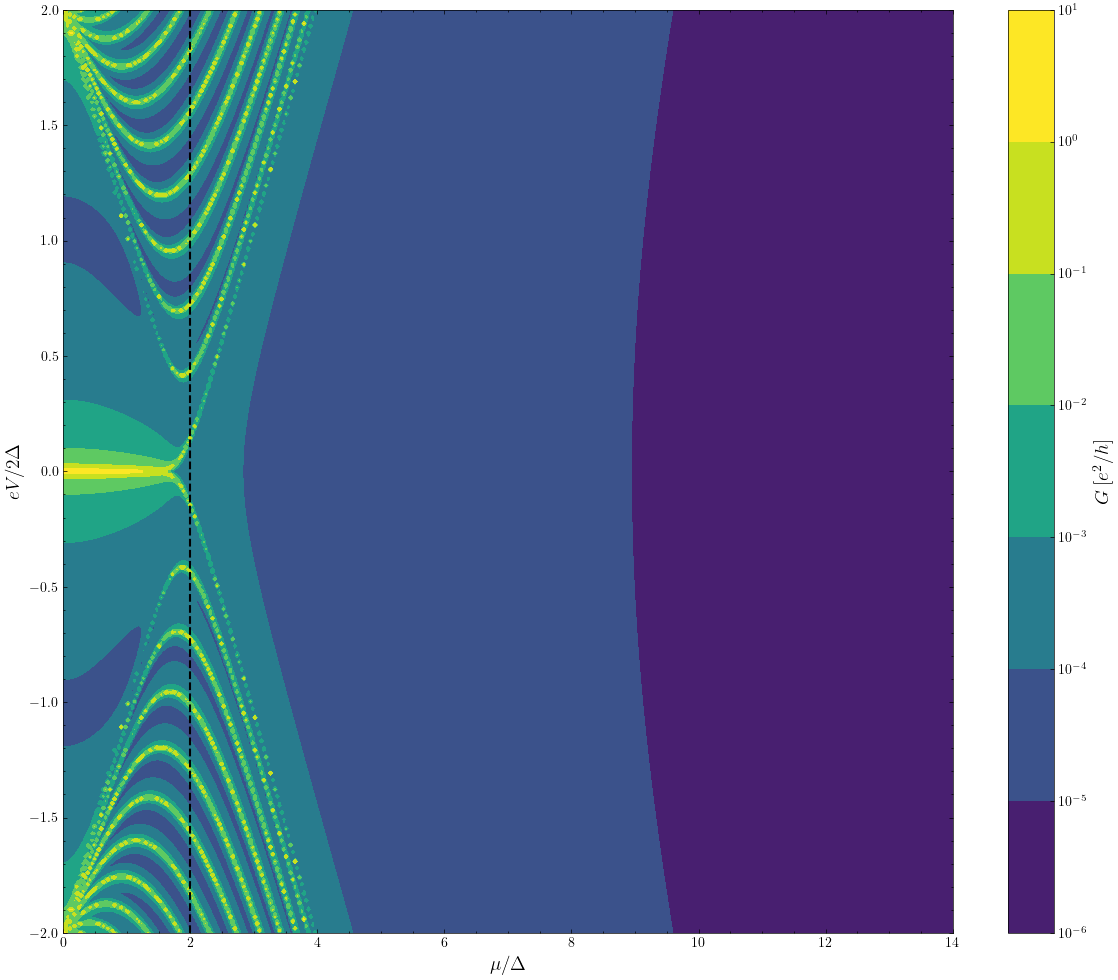

In [12]:
# Non-linear transport regime in N-S-N junctions (pristine setup)

plt.figure(figsize=(12,10))

e = 1.0
h = 1.0
eta = 1e-8
mu = 0.0
Delta = 1.0
t = 1.0*Delta
gammaL = 0.02*Delta
gammaR = 0.02*Delta
Nsites = 21

mu_vals = np.linspace(0*Delta,14*Delta,400)
E_vals = np.linspace(-2*Delta,2*Delta,400)
mu, E = np.meshgrid(mu_vals, E_vals)

# defining self-energy matrices 

SigmaL = np.zeros([2*Nsites,2*Nsites],dtype=complex)
SigmaR = np.zeros([2*Nsites,2*Nsites],dtype=complex)

SigmaL[0,0] = -1j*gammaL/2
SigmaL[1,1] = -1j*gammaL/2
SigmaR[2*Nsites-2,2*Nsites-2] = -1j*gammaR/2
SigmaR[2*Nsites-1,2*Nsites-1] = -1j*gammaR/2

# defining broadening matrices

GammaL = np.zeros([2*Nsites,2*Nsites],dtype=complex)
GammaR = np.zeros([2*Nsites,2*Nsites],dtype=complex)

GammaL = 1j*(SigmaL-np.conjugate(SigmaL).T)
GammaR = 1j*(SigmaR-np.conjugate(SigmaR).T)

# defining the BdG Hamiltonian

H_vals = np.zeros([len(mu_vals),2*Nsites,2*Nsites],dtype=complex)

for n in range(0,len(mu_vals)):
    H_vals[n] = kitaev(Nsites, mu_vals[n], t, Delta)

# defining the Green's functions

Gr_vals = np.zeros((len(E_vals), len(H_vals), 2*Nsites, 2*Nsites), dtype=complex)
Ga_vals = np.zeros((len(E_vals), len(H_vals), 2*Nsites, 2*Nsites), dtype=complex)

for i, E in enumerate(E_vals):
    for j, H in enumerate(H_vals):
        Gr_vals[i,j] = GF(E, H, SigmaL, SigmaR, eta)

Ga_vals = np.conjugate(Gr_vals).transpose(0,1,3,2)

# defining transmission coefficients

TD_vals = np.zeros([len(E_vals),len(mu_vals)])
TA_vals = np.zeros([len(E_vals),len(mu_vals)])

for i in range(0,len(E_vals)):
    for j in range(0,len(mu_vals)):
        TD_vals[i,j] = np.abs(np.trace(GammaL*Gr_vals[i,j]*GammaR*Ga_vals[i,j]))
        TA_vals[i,j] = np.abs(np.trace(GammaL*Gr_vals[i,j]*GammaL*Ga_vals[i,j]))

# defining conductance (in terms of e^2/h)

G_vals = np.zeros([len(E_vals),len(mu_vals)])

for i in range(len(E_vals)//2,len(E_vals)):
    for j in range(len(mu_vals)):
        neg_idx = len(E_vals)-i-1

        G_pos_val = 0.5*(TD_vals[i,j]+TA_vals[i,j])
        G_neg_val =  0.5*(TD_vals[neg_idx,j]+TA_vals[neg_idx,j])
        
        G_vals[i,j] = G_pos_val+G_neg_val
        G_vals[neg_idx,j] = G_vals[i,j]

contour = plt.contourf(mu_vals/Delta, E_vals/Delta, G_vals, levels=100, norm=LogNorm(vmin=1e-6,vmax=1), cmap='viridis')#, extend='both')

cbar = plt.colorbar(contour)
cbar.set_label(r'$G\:[e^{2}/h]$', fontsize=14)

plt.xlabel(r'$\mu/\Delta$', fontsize=14)
plt.ylabel(r'$eV/2\Delta$', fontsize=14)
plt.axvline(x=2*t/Delta, color='black', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

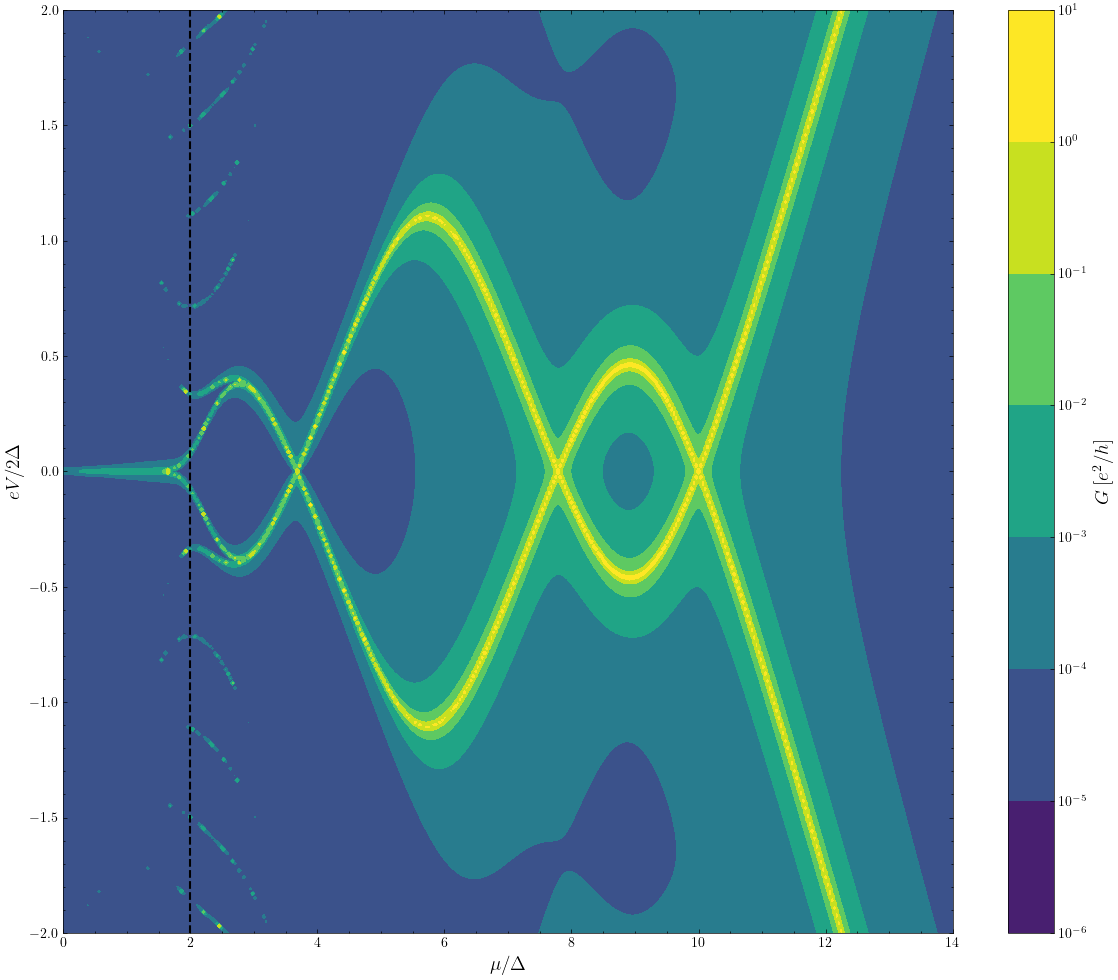

In [13]:
# Non-linear transport regime in N-S-N junctions (disordered setup)

plt.figure(figsize=(12,10))

e = 1.0
h = 1.0
eta = 1e-8
mu = 0.0
Delta = 1.0
t = 1.0*Delta
gammaL = 0.02*Delta
gammaR = 0.02*Delta
barrier = 10*Delta
sigma = 2
Nsites = 21

mu_vals = np.linspace(0*Delta,14*Delta,400)
E_vals = np.linspace(-2*Delta,2*Delta,400)
mu, E = np.meshgrid(mu_vals, E_vals)

# defining self-energy matrices 

SigmaL = np.zeros([2*Nsites,2*Nsites],dtype=complex)
SigmaR = np.zeros([2*Nsites,2*Nsites],dtype=complex)

SigmaL[0,0] = -1j*gammaL/2
SigmaL[1,1] = -1j*gammaL/2
SigmaR[2*Nsites-2,2*Nsites-2] = -1j*gammaR/2
SigmaR[2*Nsites-1,2*Nsites-1] = -1j*gammaR/2

# defining broadening matrices

GammaL = np.zeros([2*Nsites,2*Nsites],dtype=complex)
GammaR = np.zeros([2*Nsites,2*Nsites],dtype=complex)

GammaL = 1j*(SigmaL-np.conjugate(SigmaL).T)
GammaR = 1j*(SigmaR-np.conjugate(SigmaR).T)

# defining the BdG Hamiltonian

H_vals = np.zeros([len(mu_vals),2*Nsites,2*Nsites],dtype=complex)

for n in range(0,len(mu_vals)):
    H_vals[n] = kitaev_disorder(Nsites, mu_vals[n], t, Delta, barrier, sigma)

# defining the Green's functions

Gr_vals = np.zeros((len(E_vals), len(H_vals), 2*Nsites, 2*Nsites), dtype=complex)
Ga_vals = np.zeros((len(E_vals), len(H_vals), 2*Nsites, 2*Nsites), dtype=complex)

for i, E in enumerate(E_vals):
    for j, H in enumerate(H_vals):
        Gr_vals[i,j] = GF(E, H, SigmaL, SigmaR, eta)

Ga_vals = np.conjugate(Gr_vals).transpose(0,1,3,2)

# defining transmission coefficients

TD_vals = np.zeros([len(E_vals),len(mu_vals)])
TA_vals = np.zeros([len(E_vals),len(mu_vals)])

for i in range(0,len(E_vals)):
    for j in range(0,len(mu_vals)):
        TD_vals[i,j] = np.abs(np.trace(GammaL*Gr_vals[i,j]*GammaR*Ga_vals[i,j]))
        TA_vals[i,j] = np.abs(np.trace(GammaL*Gr_vals[i,j]*GammaL*Ga_vals[i,j]))

# defining conductance (in terms of e^2/h)

G_vals = np.zeros([len(E_vals),len(mu_vals)])

for i in range(len(E_vals)//2,len(E_vals)):
    for j in range(len(mu_vals)):
        neg_idx = len(E_vals)-i-1

        G_pos_val = 0.5*(TD_vals[i,j]+TA_vals[i,j])
        G_neg_val =  0.5*(TD_vals[neg_idx,j]+TA_vals[neg_idx,j])
        
        G_vals[i,j] = G_pos_val+G_neg_val
        G_vals[neg_idx,j] = G_vals[i,j]

contour = plt.contourf(mu_vals/Delta, E_vals/Delta, G_vals, levels=100, norm=LogNorm(vmin=1e-6,vmax=1), cmap='viridis')#, extend='both')

cbar = plt.colorbar(contour)
cbar.set_label(r'$G\:[e^{2}/h]$', fontsize=14)

plt.xlabel(r'$\mu/\Delta$', fontsize=14)
plt.ylabel(r'$eV/2\Delta$', fontsize=14)
plt.axvline(x=2*t/Delta, color='black', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()